In [74]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import timedelta


warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("data/Train.csv")
df.head(1)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.5,92,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [3]:
# Columns to drop
columns_to_drop = ['Place_ID X Date', 'target_min', 'target_max', 'target_variance', 'target_count']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [4]:
df.head(1)

,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,2020-01-02,010Q650,38.0,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118


In [5]:
df.shape

(30557, 77)

In [6]:
# Convert the 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Place_ID' and filter groups that have at least 13 entries
df_filtered = df.groupby('Place_ID').filter(lambda x: len(x) >= 13)

# Sort the filtered data by 'Place_ID' and 'Date'
df_sorted = df_filtered.sort_values(by=['Place_ID', 'Date'])

we'll focus on imputing and handling missing values within each Place_ID group. This is important to preserve the integrity of the data because, as you mentioned, averaging across different locations could distort the results.

In [7]:
# Create a variable num_features with the list of numerical features
num_features = [
    'precipitable_water_entire_atmosphere',
    'relative_humidity_2m_above_ground',
    'specific_humidity_2m_above_ground',
    'temperature_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'v_component_of_wind_10m_above_ground',
    'L3_NO2_NO2_column_number_density',
    'L3_NO2_NO2_slant_column_number_density',
    'L3_NO2_absorbing_aerosol_index',
    'L3_NO2_cloud_fraction',
    'L3_NO2_sensor_altitude',
    'L3_NO2_sensor_azimuth_angle',
    'L3_NO2_sensor_zenith_angle',
    'L3_NO2_solar_azimuth_angle',
    'L3_NO2_solar_zenith_angle',
    'L3_NO2_stratospheric_NO2_column_number_density',
    'L3_NO2_tropopause_pressure',
    'L3_NO2_tropospheric_NO2_column_number_density',
    'L3_O3_O3_column_number_density',
    'L3_O3_O3_effective_temperature',
    'L3_O3_cloud_fraction',
    'L3_O3_sensor_azimuth_angle',
    'L3_O3_sensor_zenith_angle',
    'L3_O3_solar_azimuth_angle',
    'L3_O3_solar_zenith_angle',
    'L3_CO_CO_column_number_density',
    'L3_CO_H2O_column_number_density',
    'L3_CO_cloud_height',
    'L3_CO_sensor_altitude',
    'L3_CO_sensor_azimuth_angle',
    'L3_CO_sensor_zenith_angle',
    'L3_CO_solar_azimuth_angle',
    'L3_CO_solar_zenith_angle',
    'L3_HCHO_HCHO_slant_column_number_density',
    'L3_HCHO_cloud_fraction',
    'L3_HCHO_sensor_azimuth_angle',
    'L3_HCHO_sensor_zenith_angle',
    'L3_HCHO_solar_azimuth_angle',
    'L3_HCHO_solar_zenith_angle',
    'L3_HCHO_tropospheric_HCHO_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
    'L3_CLOUD_cloud_base_height',
    'L3_CLOUD_cloud_base_pressure',
    'L3_CLOUD_cloud_fraction',
    'L3_CLOUD_cloud_optical_depth',
    'L3_CLOUD_cloud_top_height',
    'L3_CLOUD_cloud_top_pressure',
    'L3_CLOUD_sensor_azimuth_angle',
    'L3_CLOUD_sensor_zenith_angle',
    'L3_CLOUD_solar_azimuth_angle',
    'L3_CLOUD_solar_zenith_angle',
    'L3_CLOUD_surface_albedo',
    'L3_AER_AI_absorbing_aerosol_index',
    'L3_AER_AI_sensor_altitude',
    'L3_AER_AI_sensor_azimuth_angle',
    'L3_AER_AI_sensor_zenith_angle',
    'L3_AER_AI_solar_azimuth_angle',
    'L3_AER_AI_solar_zenith_angle',
    'L3_SO2_SO2_column_number_density',
    'L3_SO2_SO2_column_number_density_amf',
    'L3_SO2_SO2_slant_column_number_density',
    'L3_SO2_absorbing_aerosol_index',
    'L3_SO2_cloud_fraction',
    'L3_SO2_sensor_azimuth_angle',
    'L3_SO2_sensor_zenith_angle',
    'L3_SO2_solar_azimuth_angle',
    'L3_SO2_solar_zenith_angle',
    'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
    'L3_CH4_aerosol_height',
    'L3_CH4_aerosol_optical_depth',
    'L3_CH4_sensor_azimuth_angle',
    'L3_CH4_sensor_zenith_angle',
    'L3_CH4_solar_azimuth_angle',
    'L3_CH4_solar_zenith_angle'
]


In [8]:
# Checking for NaNs and nulls within the numerical features of the df_sorted
nan_summary = df_sorted[num_features].isna().sum()

# Display the count of NaN values for each numerical feature
print(nan_summary)


precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        2187
L3_NO2_NO2_slant_column_number_density                  2187
L3_NO2_absorbing_aerosol_index                          2187
L3_NO2_cloud_fraction                                   2187
L3_NO2_sensor_altitude                                  2187
L3_NO2_sensor_azimuth_angle                             2188
L3_NO2_sensor_zenith_angle                              2188
L3_NO2_solar_azimuth_angle                              2188
L3_NO2_solar_zenith_angle                               2188
L3_NO2_stratospheric_NO2_column_number_density          2188
L3_NO2_tropopause_pressu

1. Drop the data for everything above 20.0000 missing values > 75%

In [9]:
# Define the columns to drop based on your missing value threshold
columns_to_drop = [
    'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
    'L3_CH4_aerosol_height',
    'L3_CH4_aerosol_optical_depth',
    'L3_CH4_sensor_azimuth_angle',
    'L3_CH4_sensor_zenith_angle',
    'L3_CH4_solar_azimuth_angle',
    'L3_CH4_solar_zenith_angle'
]

# Drop the columns from df_sorted
df_cleaned = df_sorted.drop(columns=columns_to_drop)

# Display the remaining columns after dropping
print(df_cleaned.columns)


Index(['Date', 'Place_ID', 'target', 'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle',

In [10]:
# Filter 'num_features' to only include columns that are still in 'df_cleaned' not the droped ones
valid_features = [col for col in num_features if col in df_cleaned.columns]

# Checking for NaNs and nulls within the remaining numerical features
nan_summary_2 = df_cleaned[valid_features].isna().sum()

# Display the count of NaN values for each numerical feature
print(nan_summary_2)


precipitable_water_entire_atmosphere                      0
relative_humidity_2m_above_ground                         0
specific_humidity_2m_above_ground                         0
temperature_2m_above_ground                               0
u_component_of_wind_10m_above_ground                      0
v_component_of_wind_10m_above_ground                      0
L3_NO2_NO2_column_number_density                       2187
L3_NO2_NO2_slant_column_number_density                 2187
L3_NO2_absorbing_aerosol_index                         2187
L3_NO2_cloud_fraction                                  2187
L3_NO2_sensor_altitude                                 2187
L3_NO2_sensor_azimuth_angle                            2188
L3_NO2_sensor_zenith_angle                             2188
L3_NO2_solar_azimuth_angle                             2188
L3_NO2_solar_zenith_angle                              2188
L3_NO2_stratospheric_NO2_column_number_density         2188
L3_NO2_tropopause_pressure              

In [11]:
df_cleaned.head(1)

,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,2020-01-02,010Q650,38.0,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.0,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665


Mean Imputation:
Use for continuous variables that are normally distributed and where outliers are not expected to significantly skew the mean.
Columns:
precipitable_water_entire_atmosphere
relative_humidity_2m_above_ground
specific_humidity_2m_above_ground
temperature_2m_above_ground
u_component_of_wind_10m_above_ground
v_component_of_wind_10m_above_ground


Median Imputation:
Use for variables that may be skewed or contain outliers.
Columns:
rest

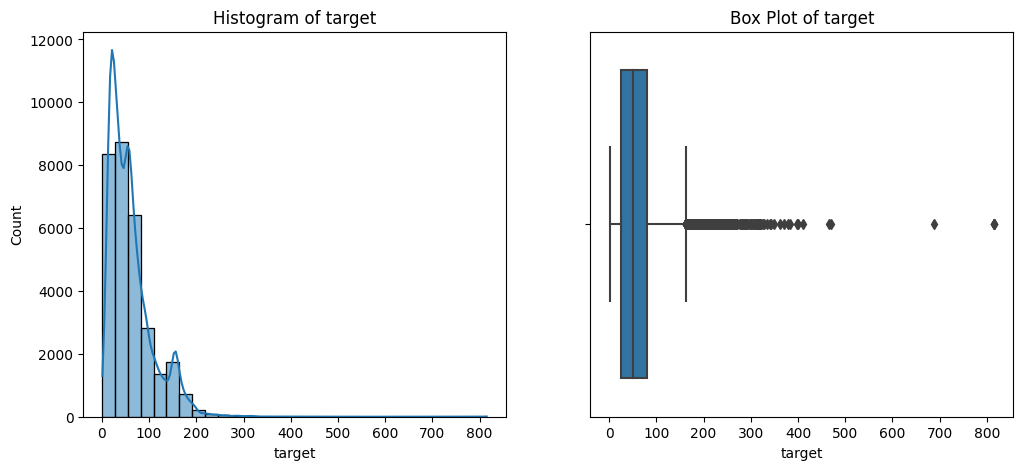

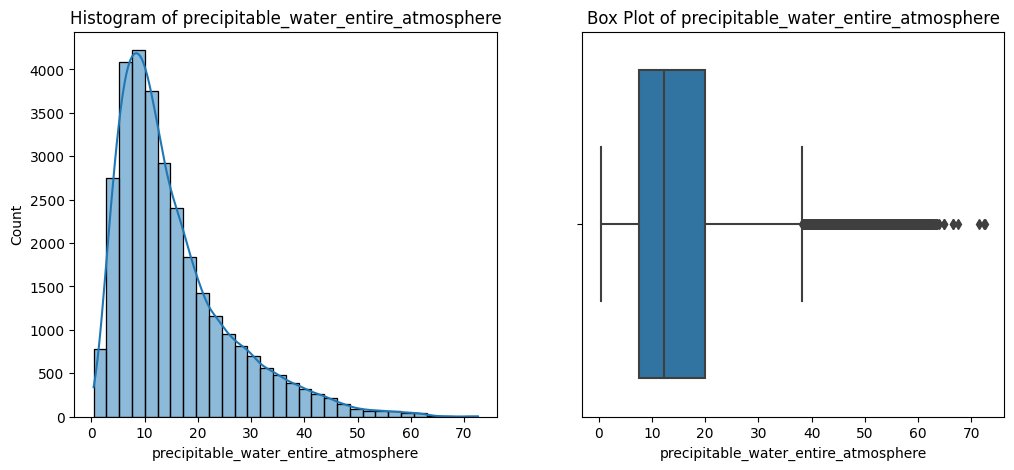

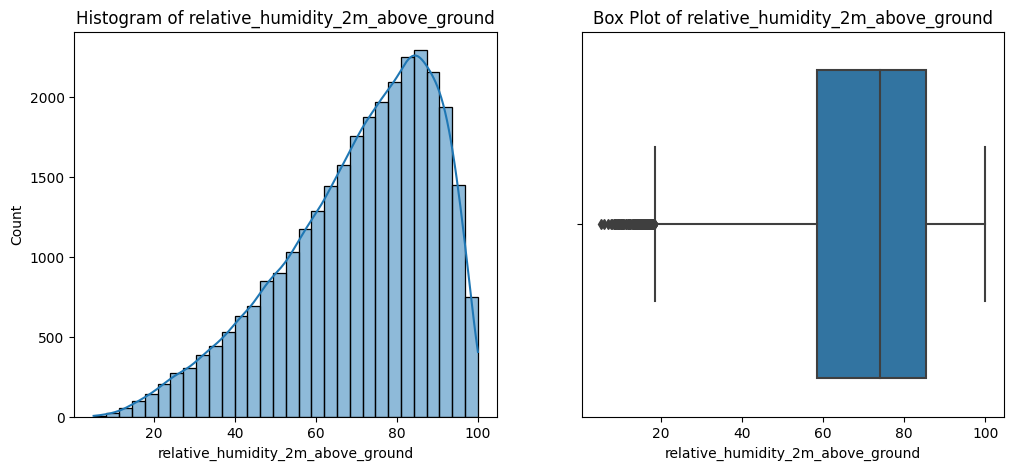

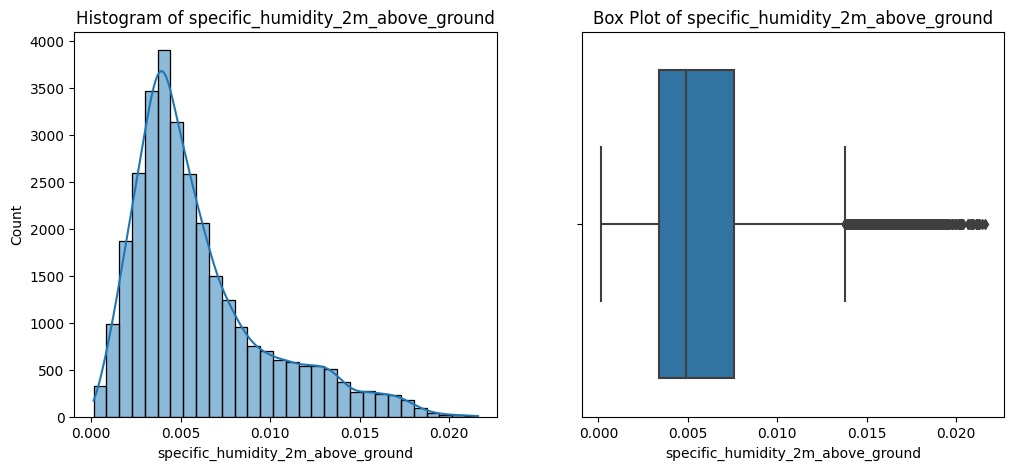

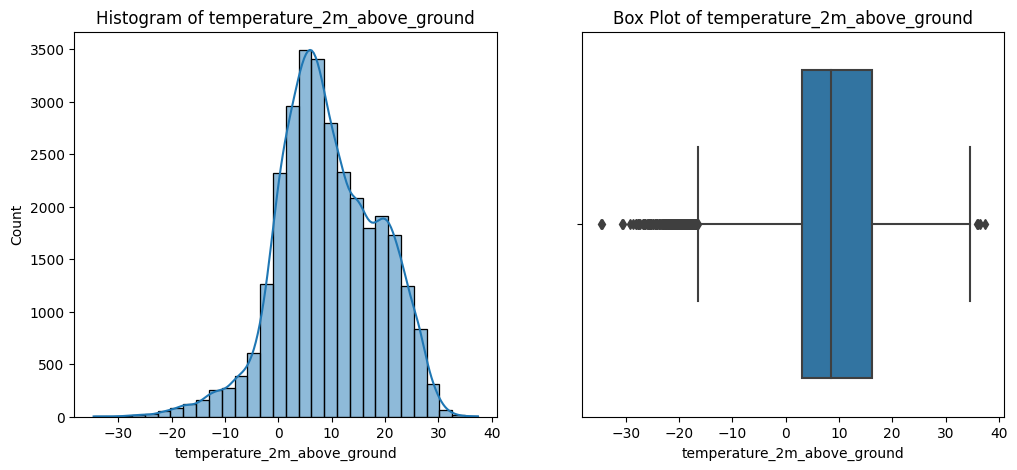

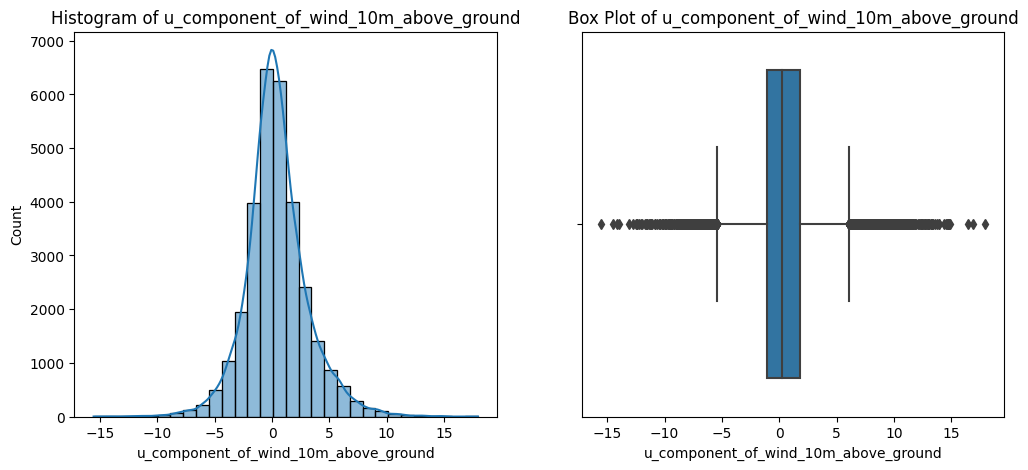

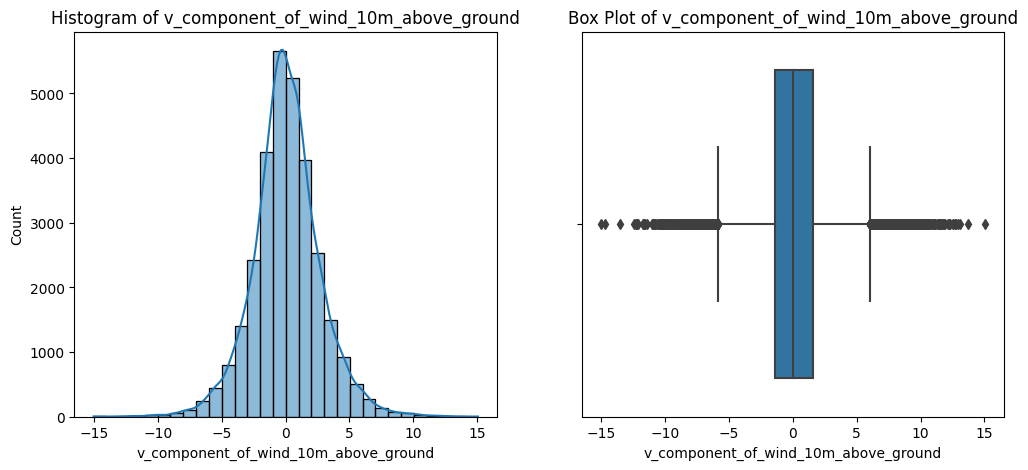

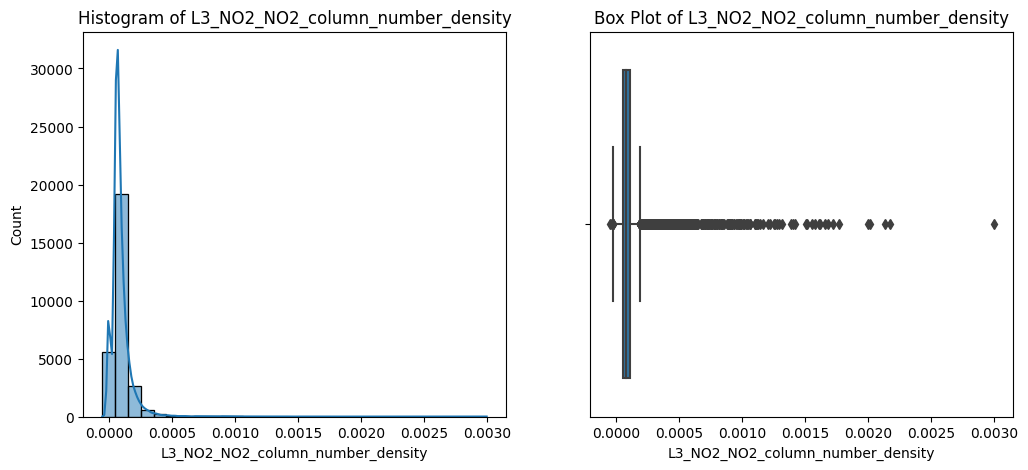

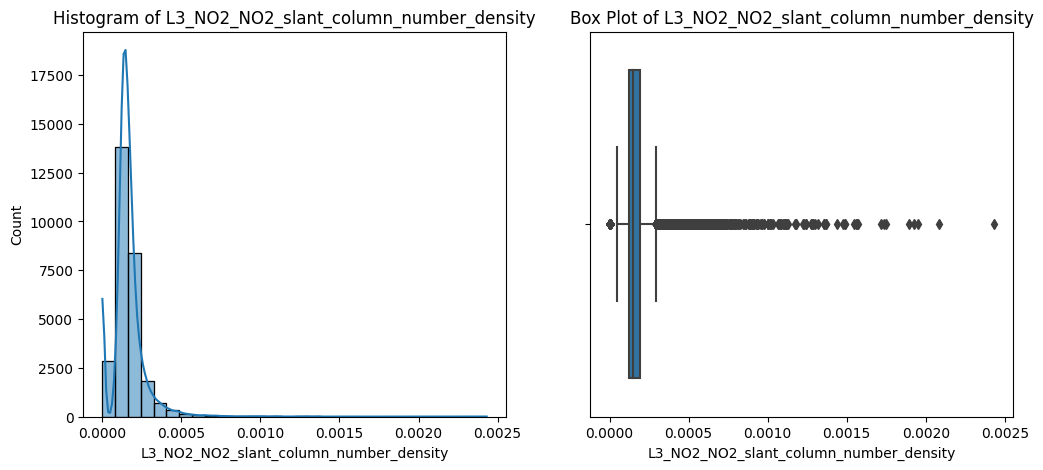

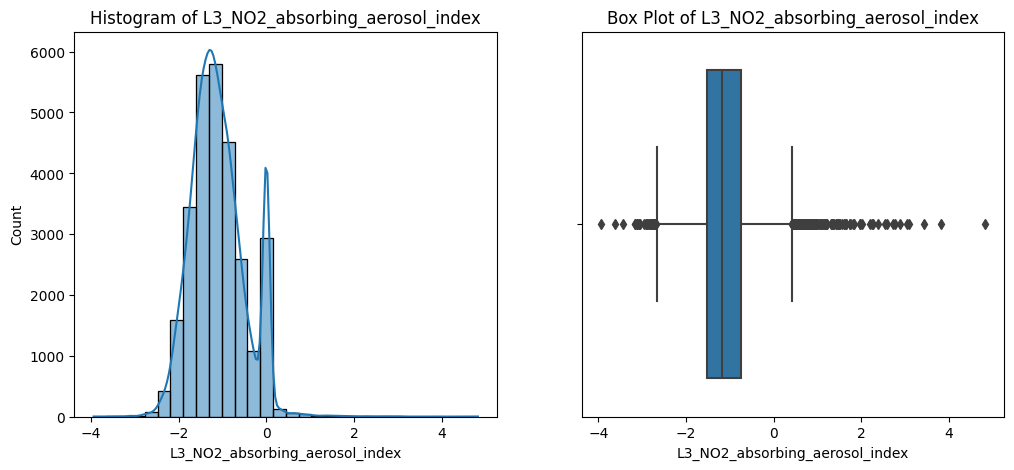

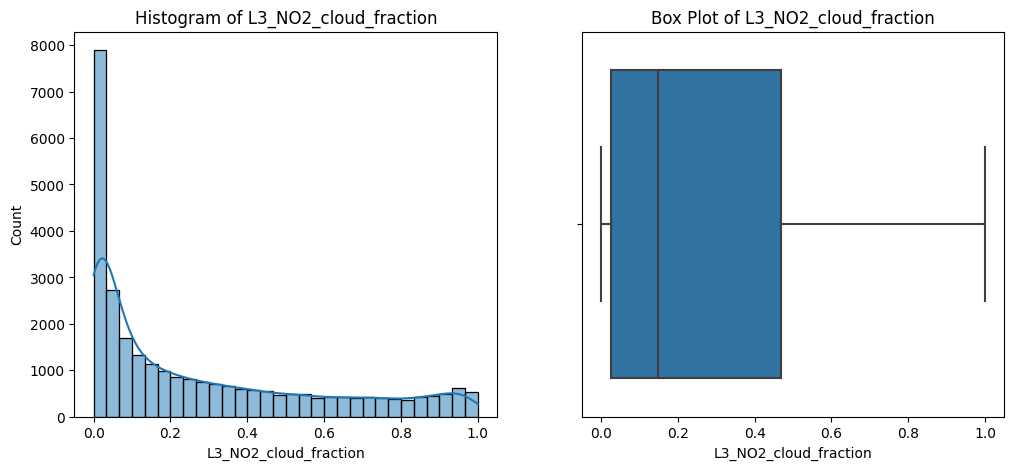

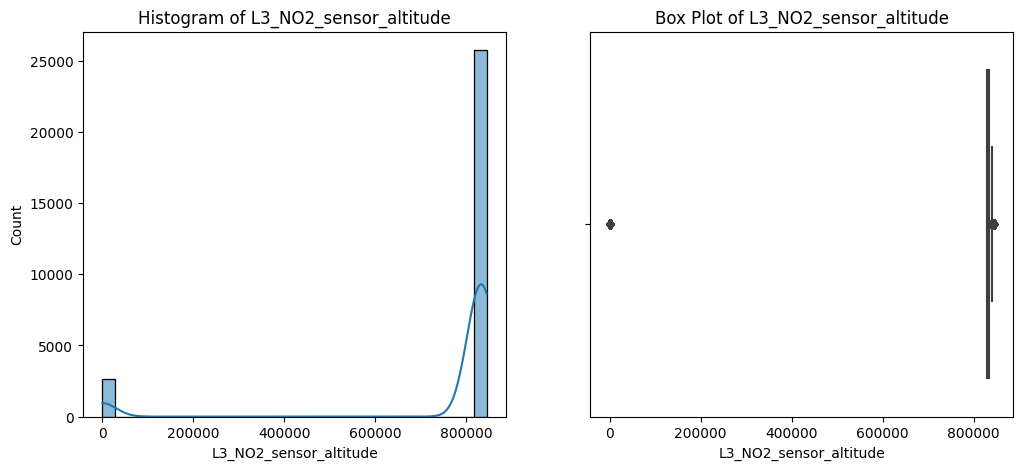

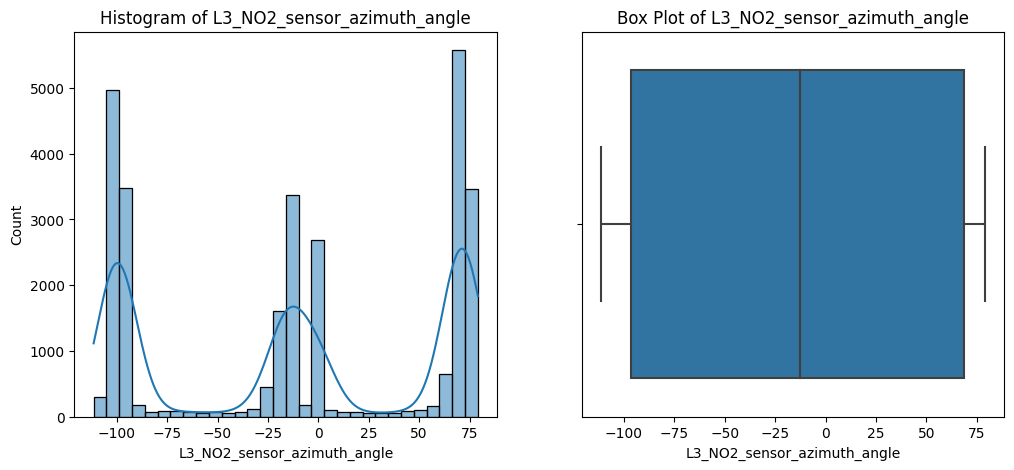

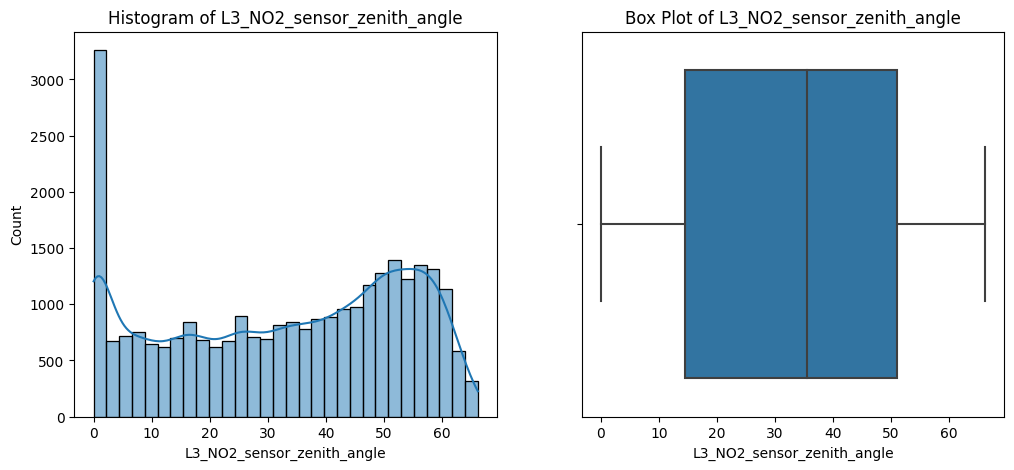

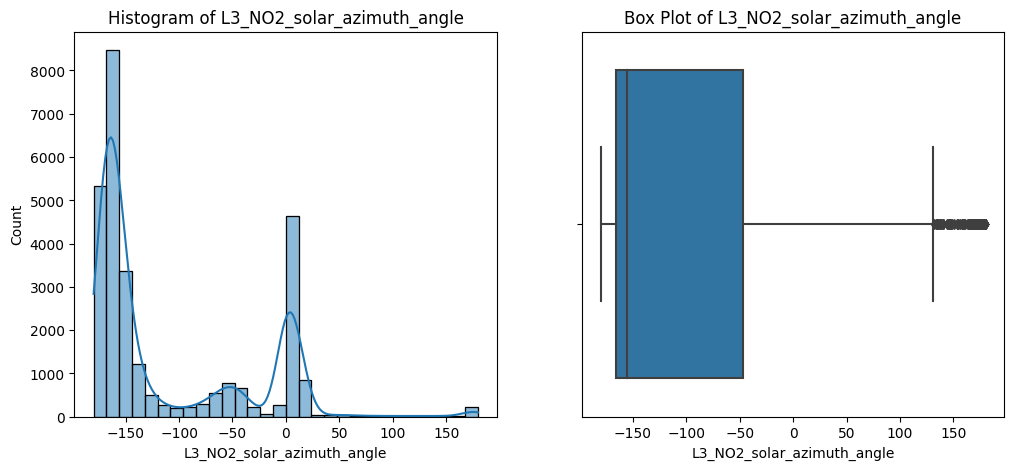

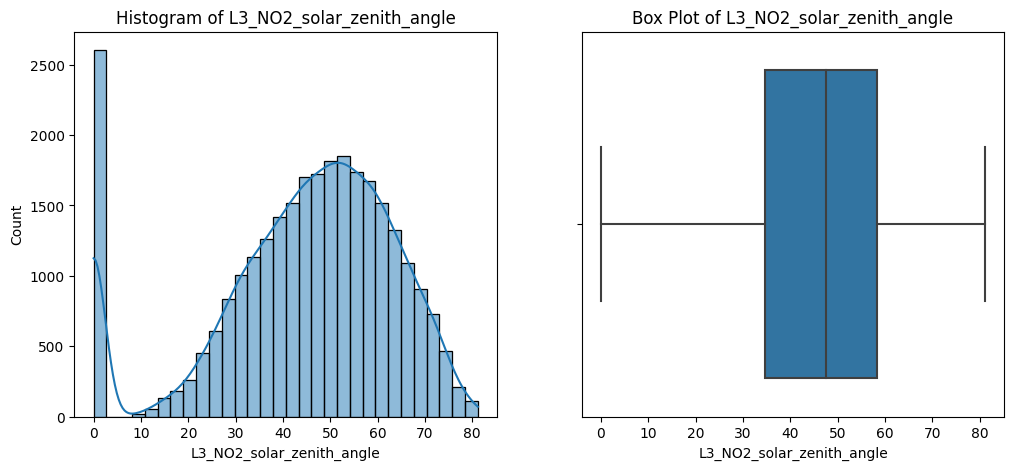

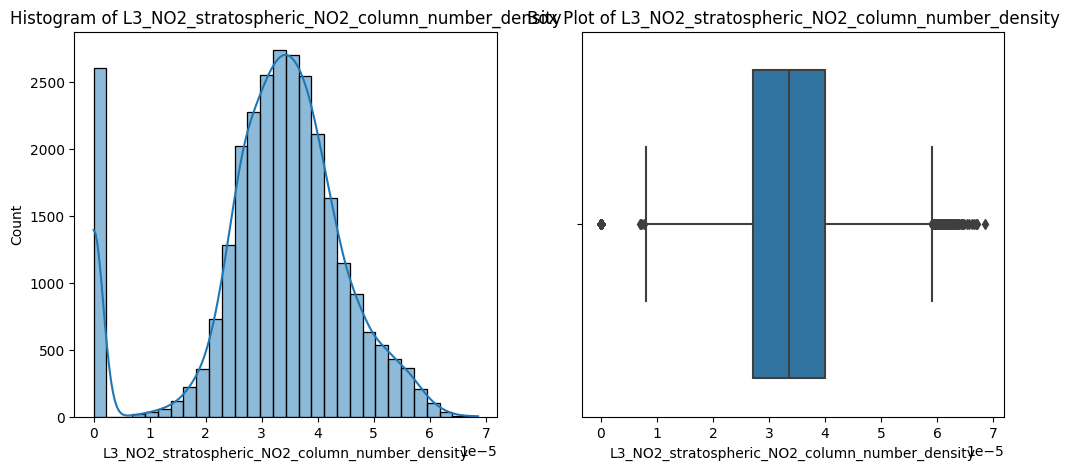

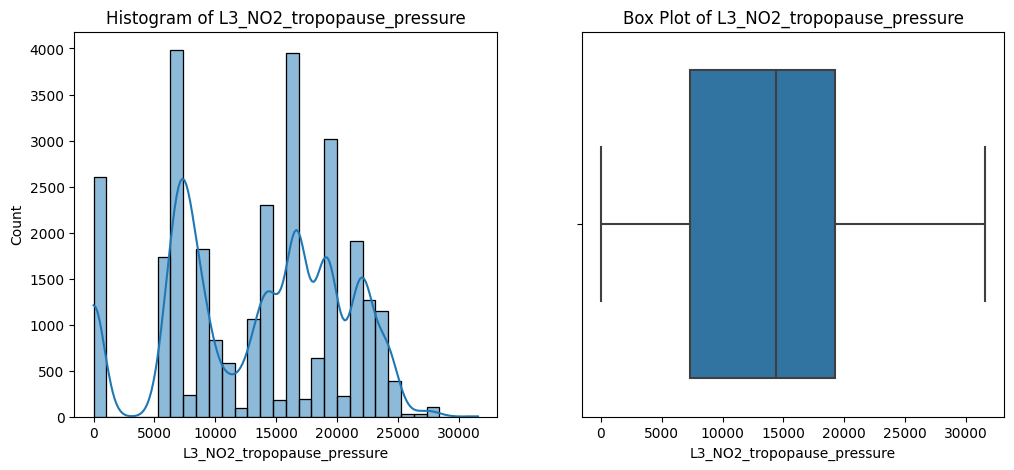

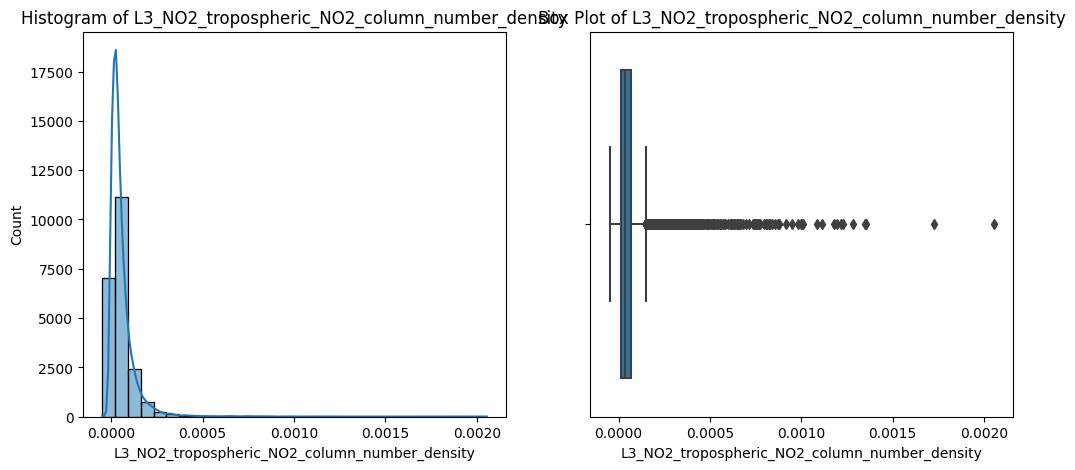

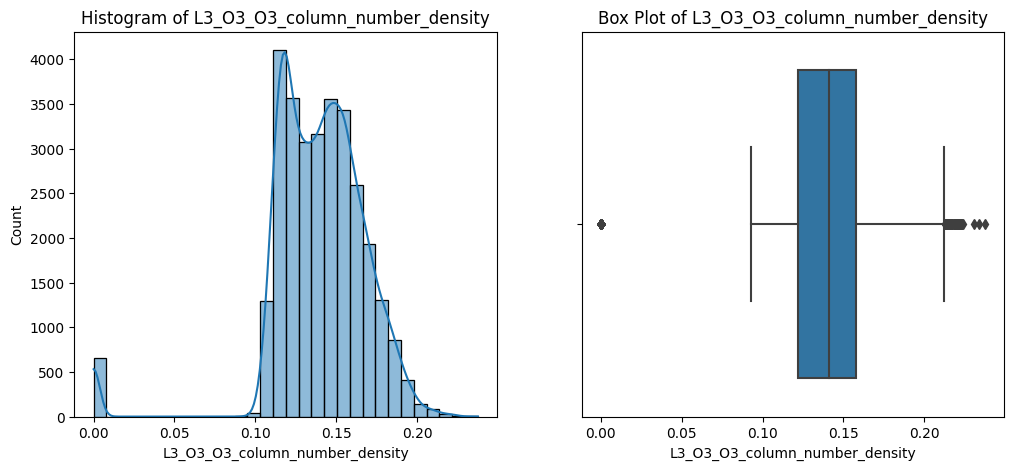

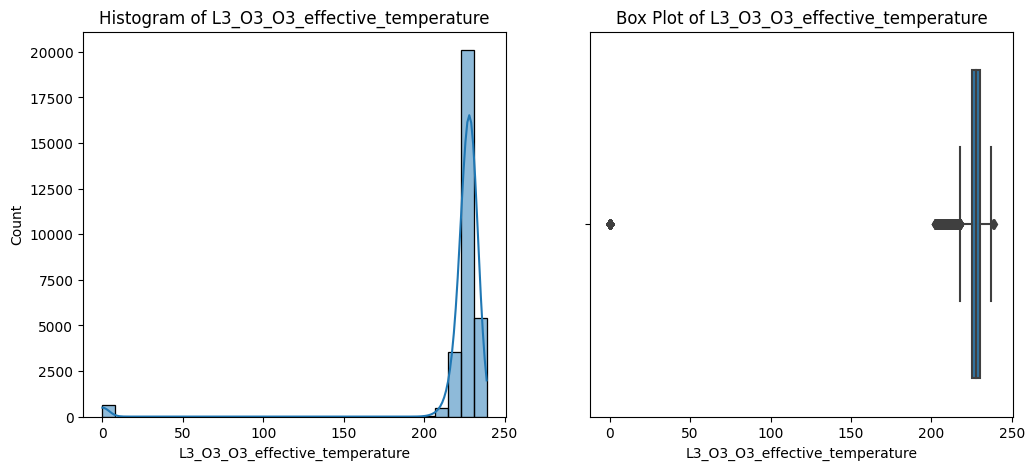

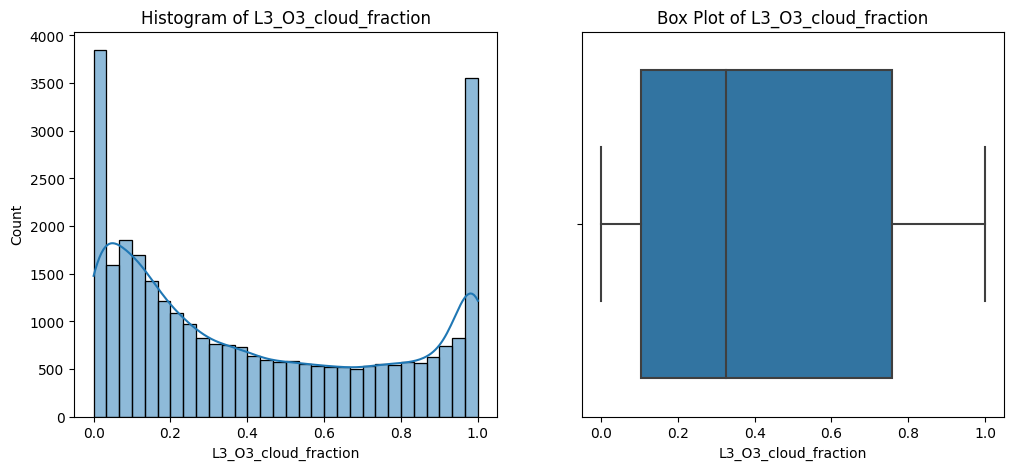

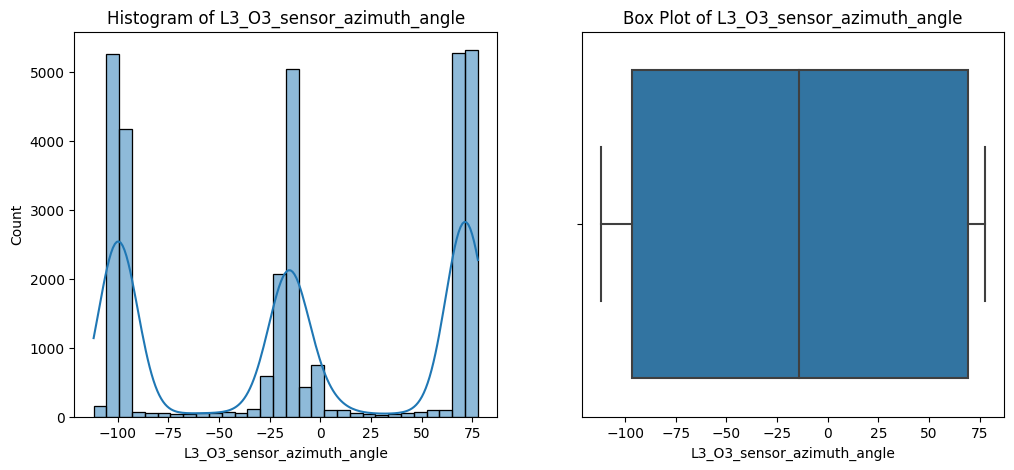

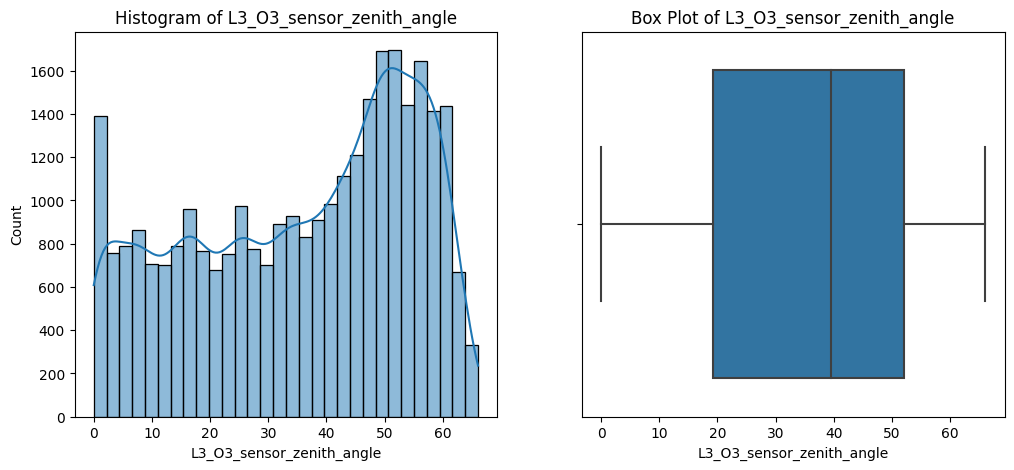

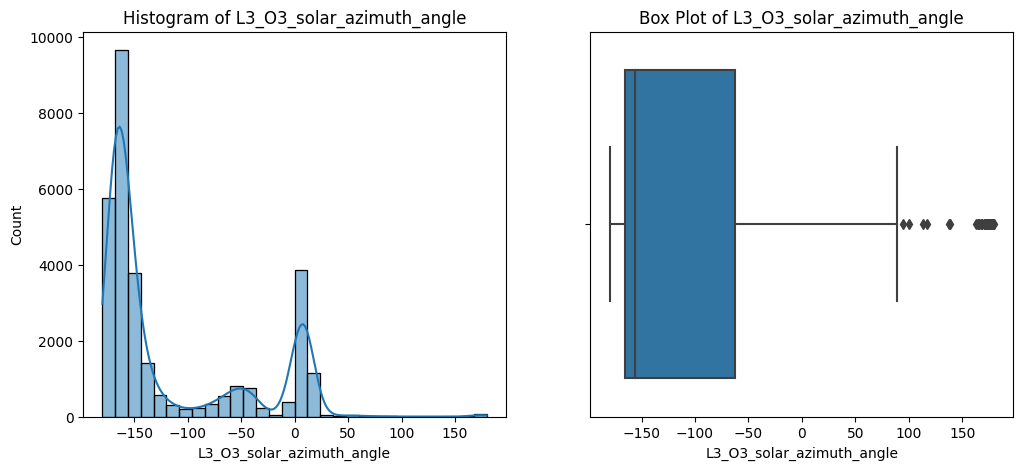

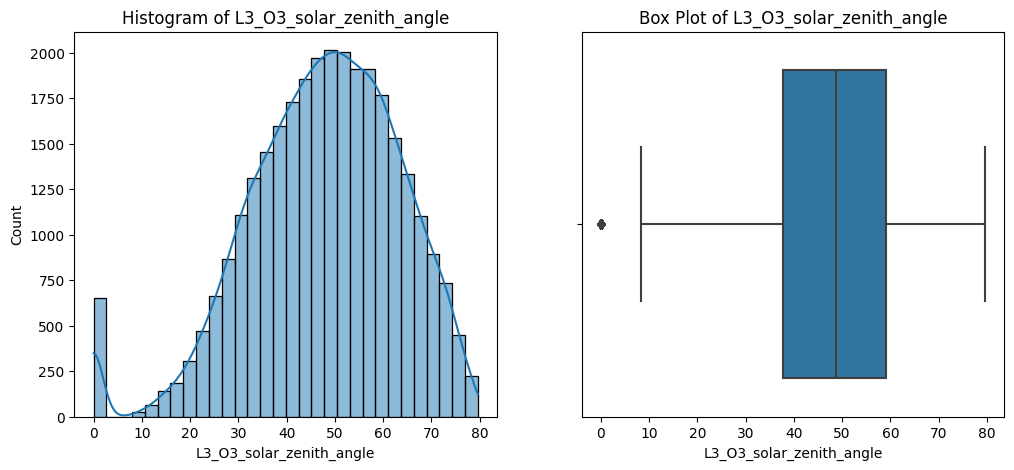

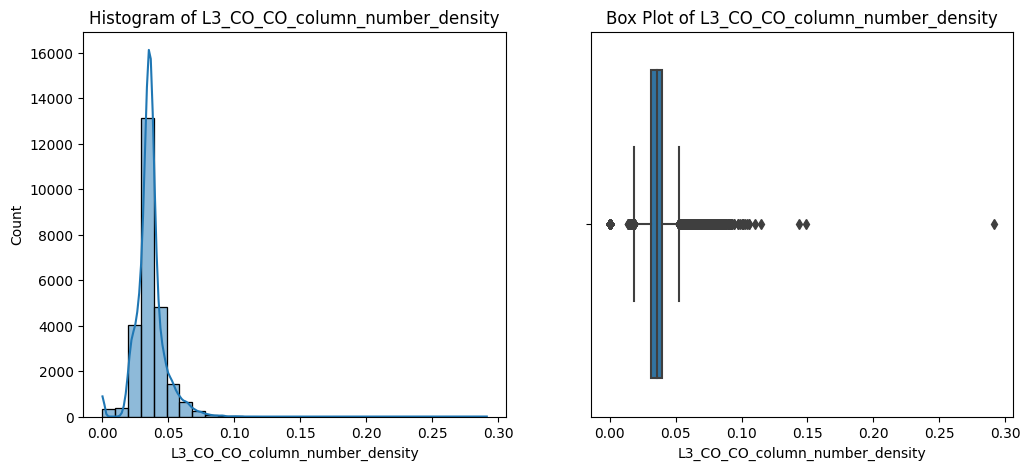

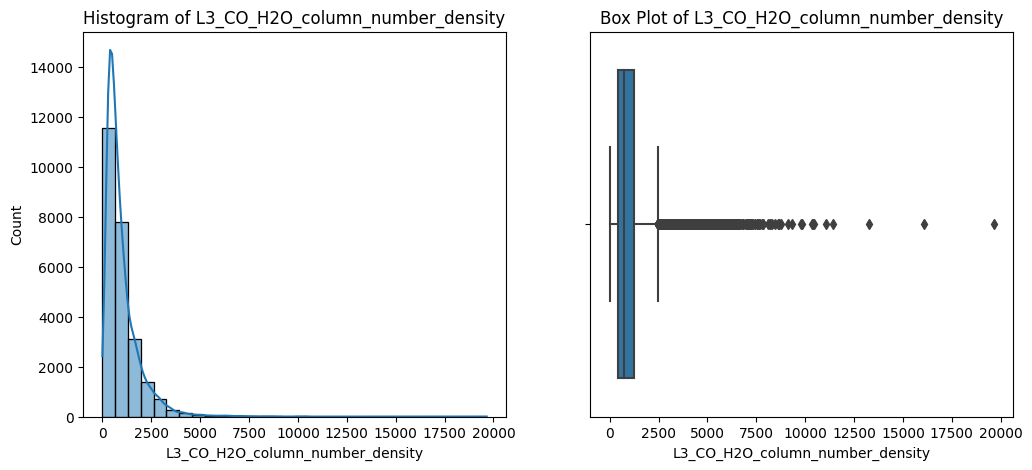

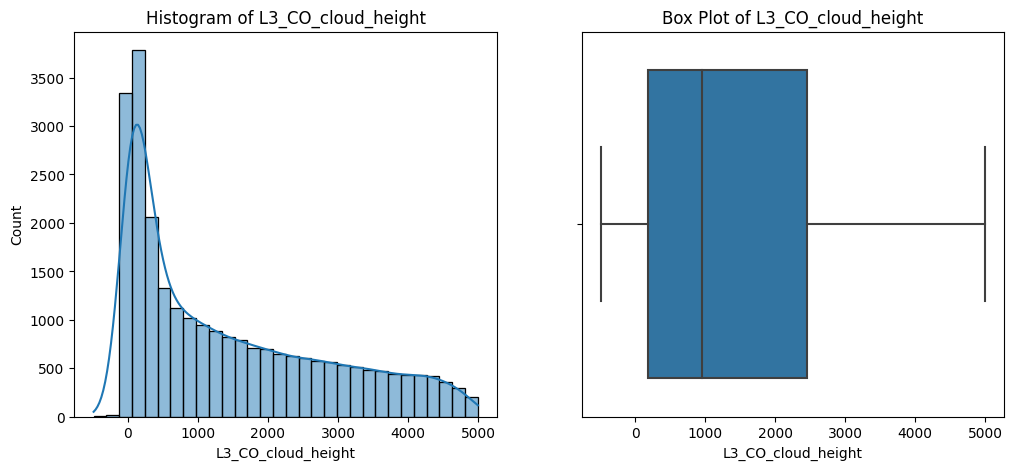

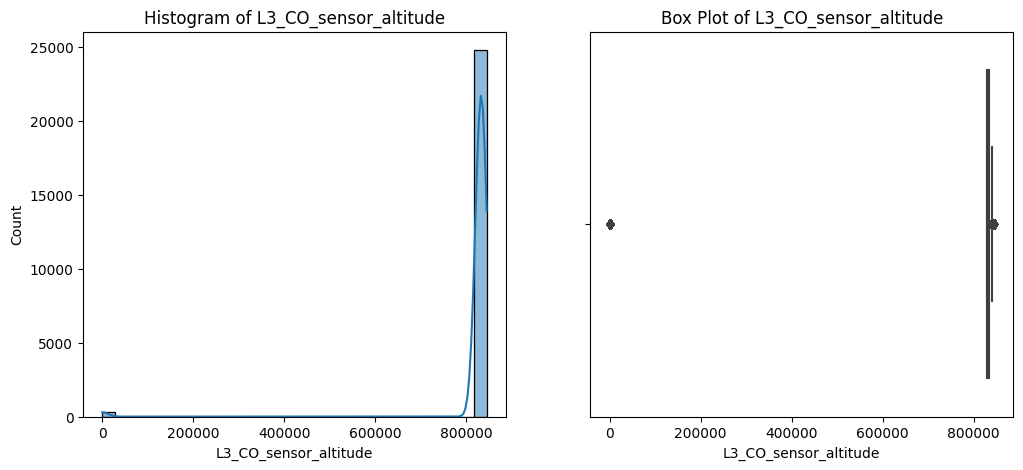

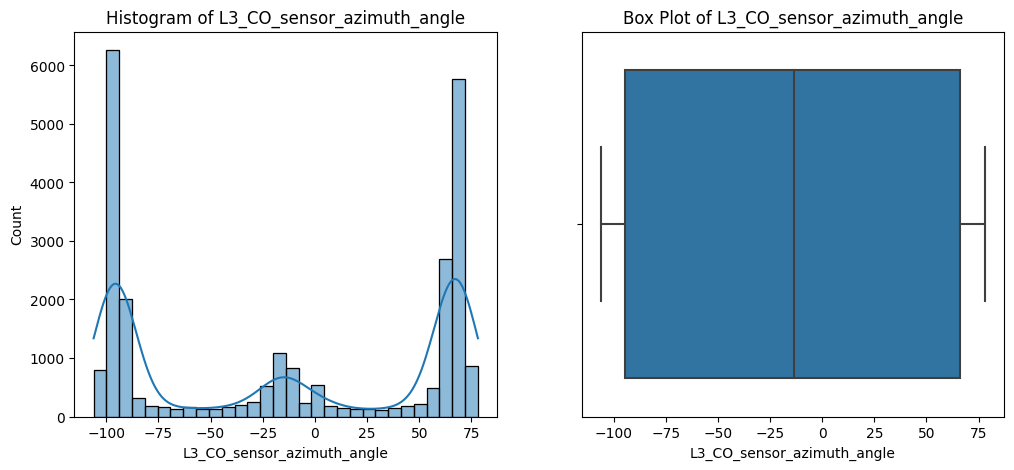

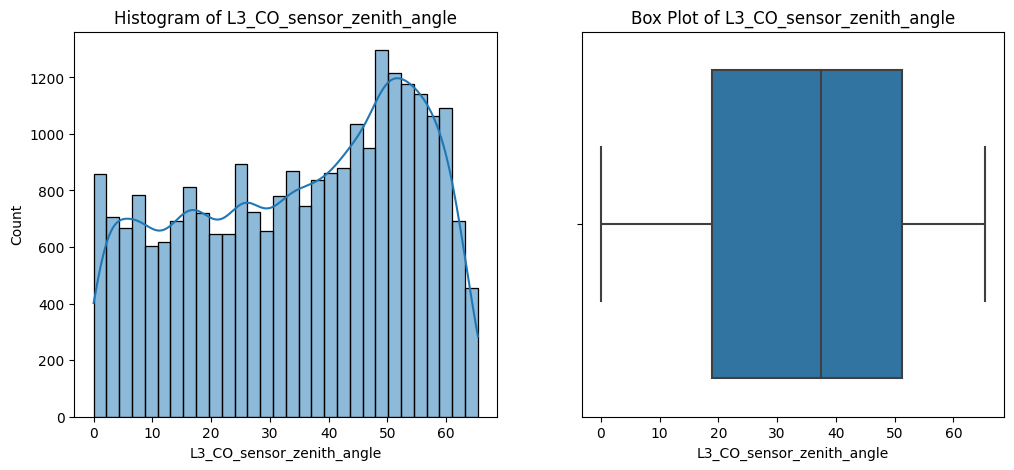

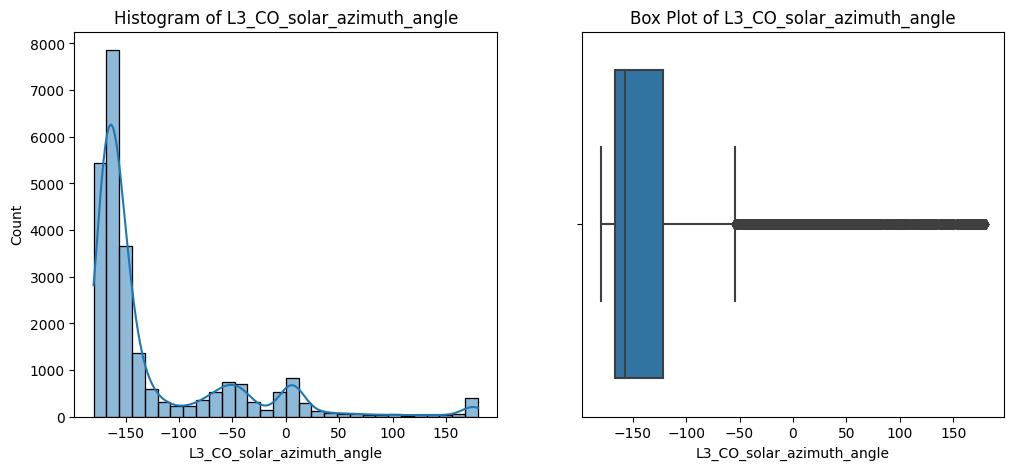

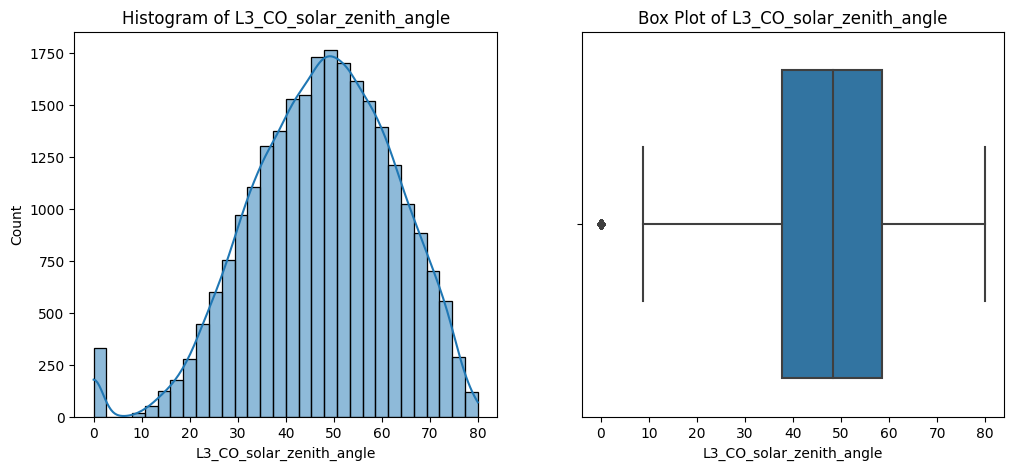

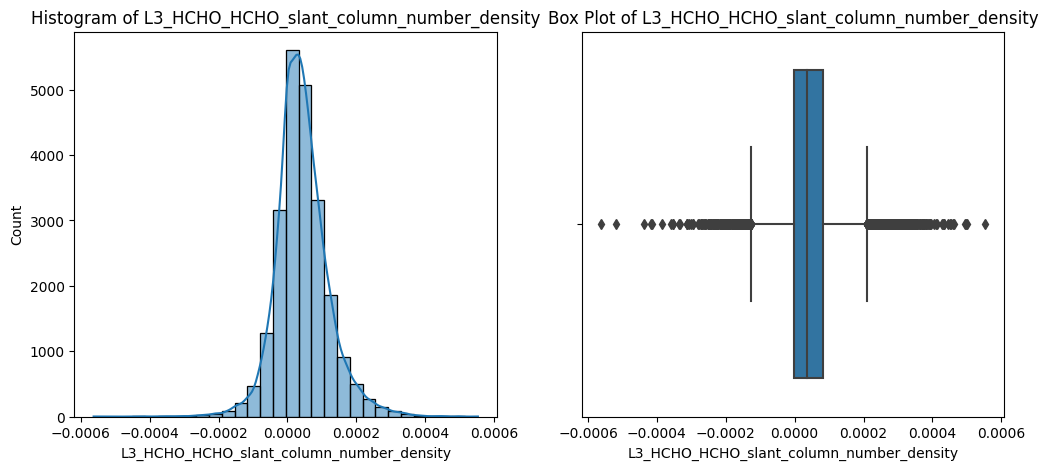

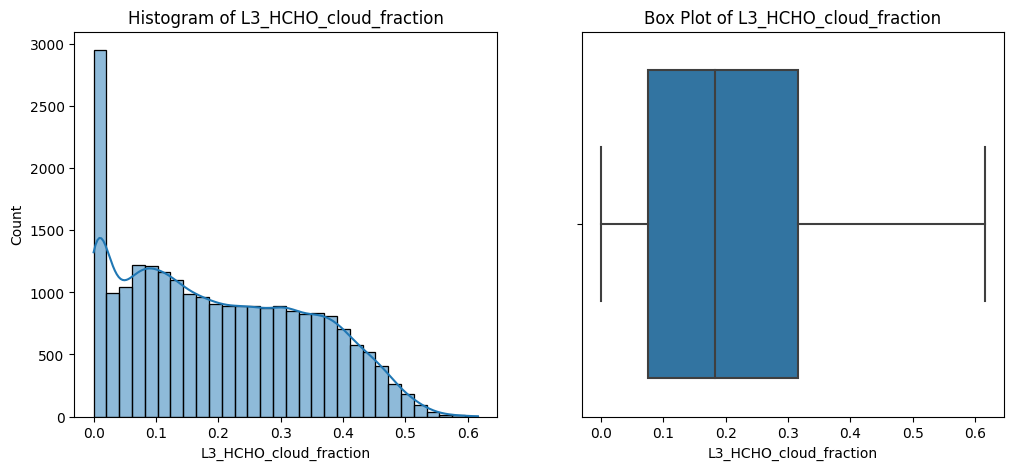

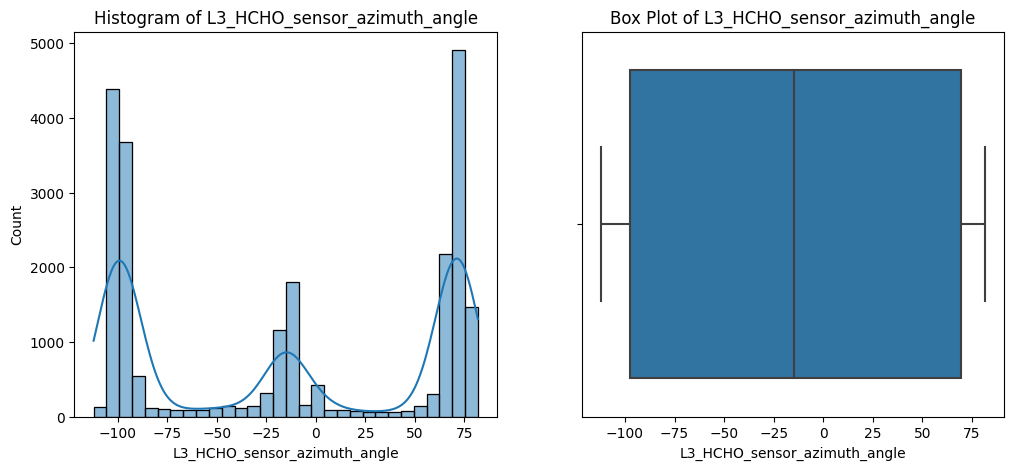

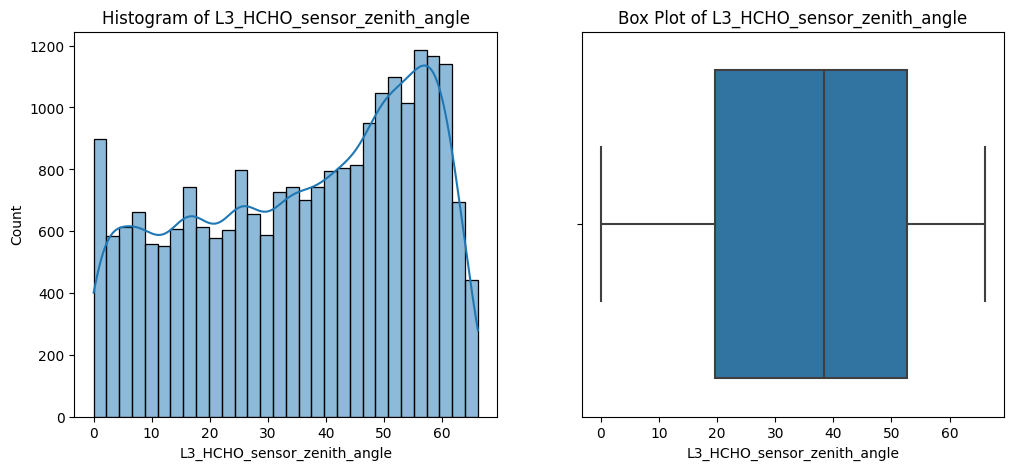

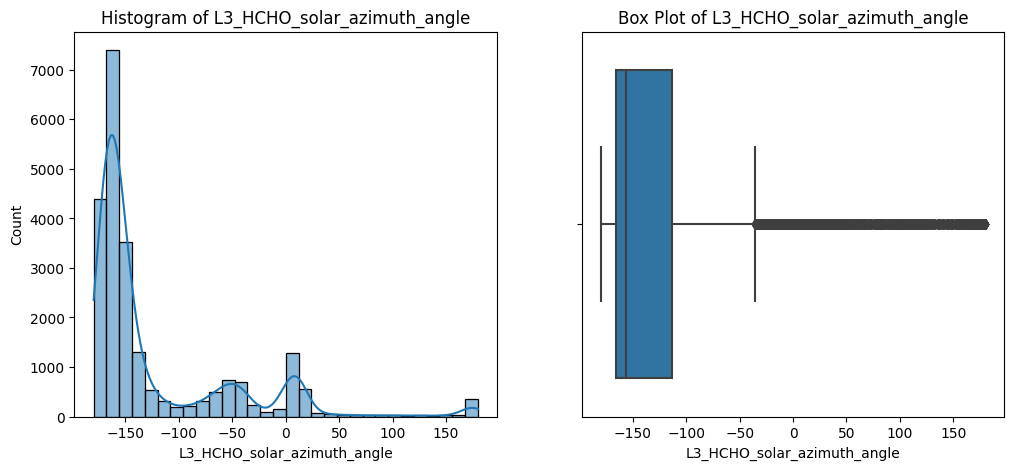

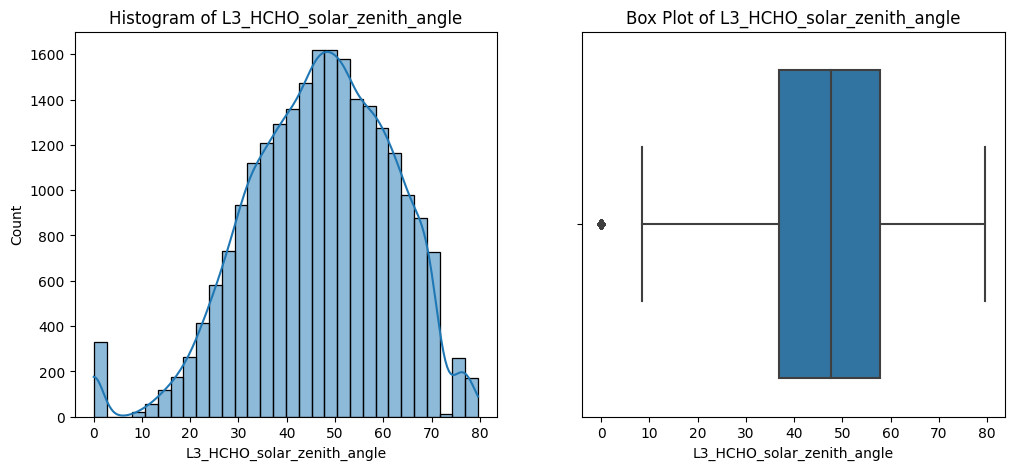

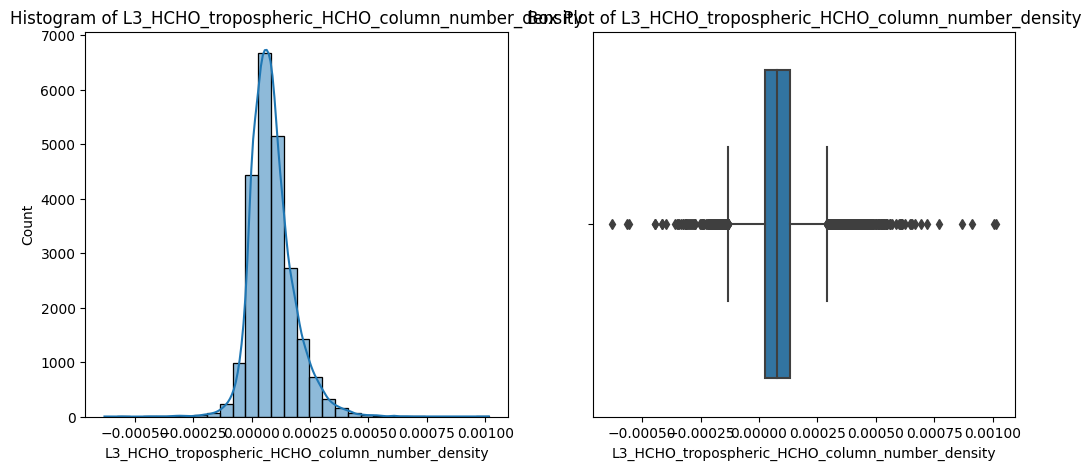

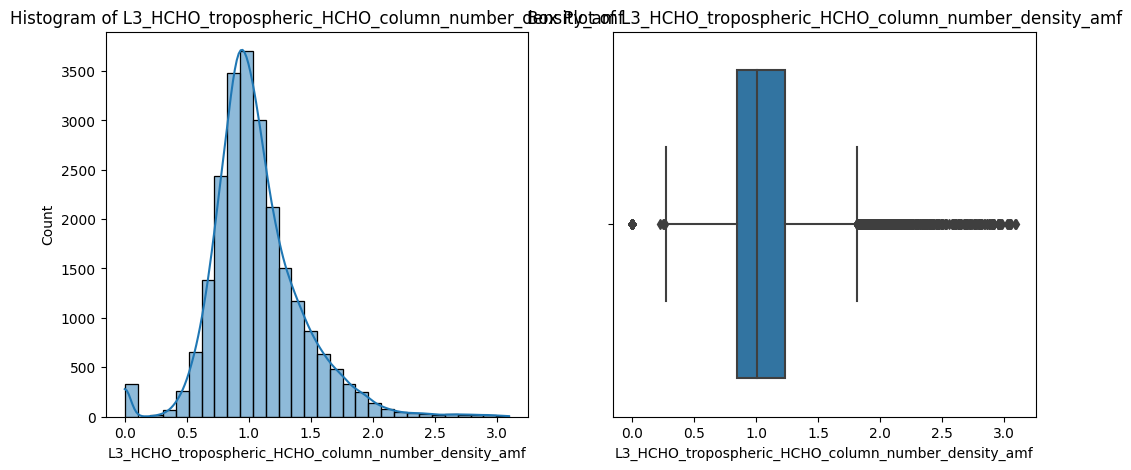

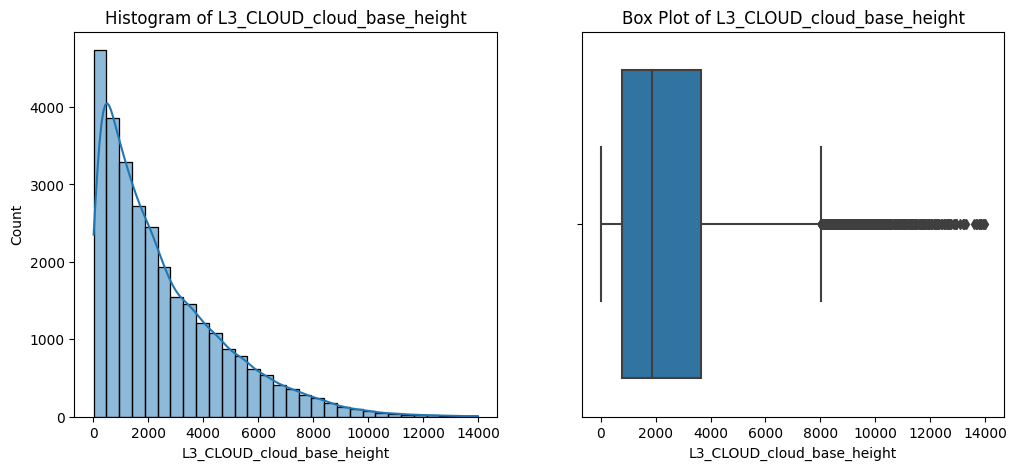

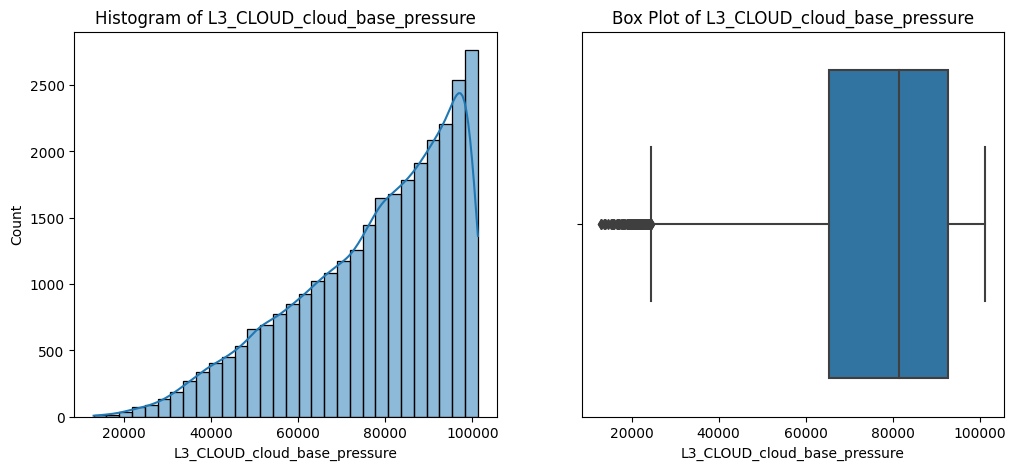

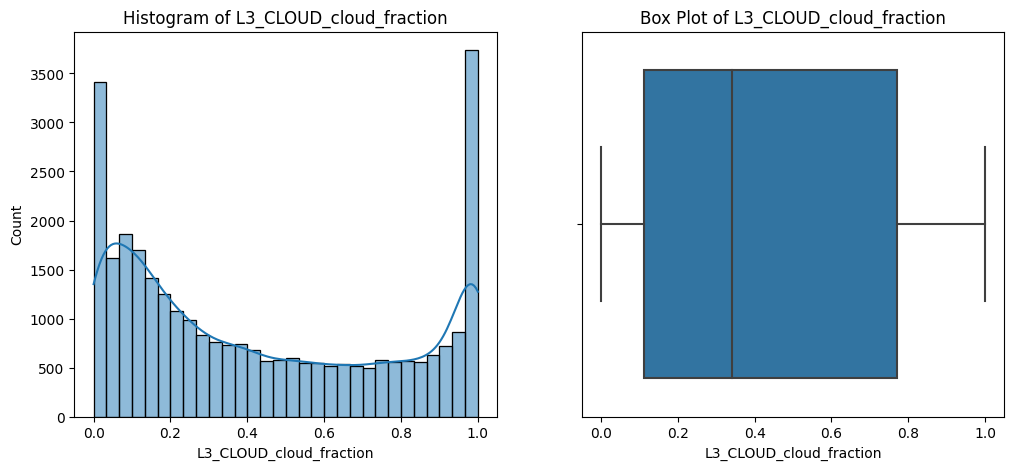

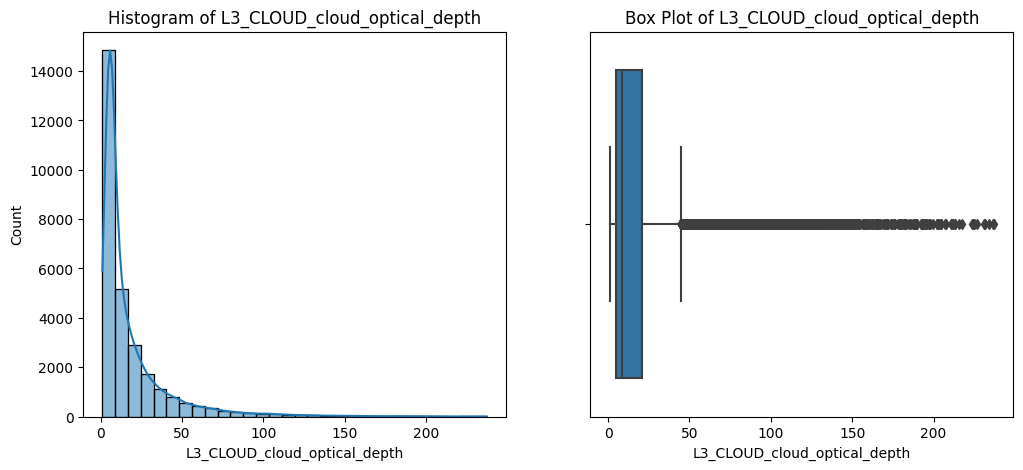

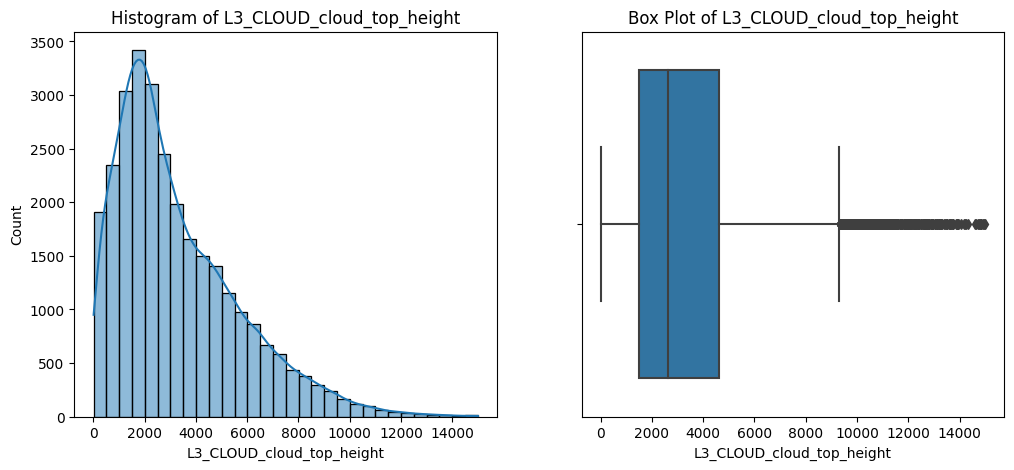

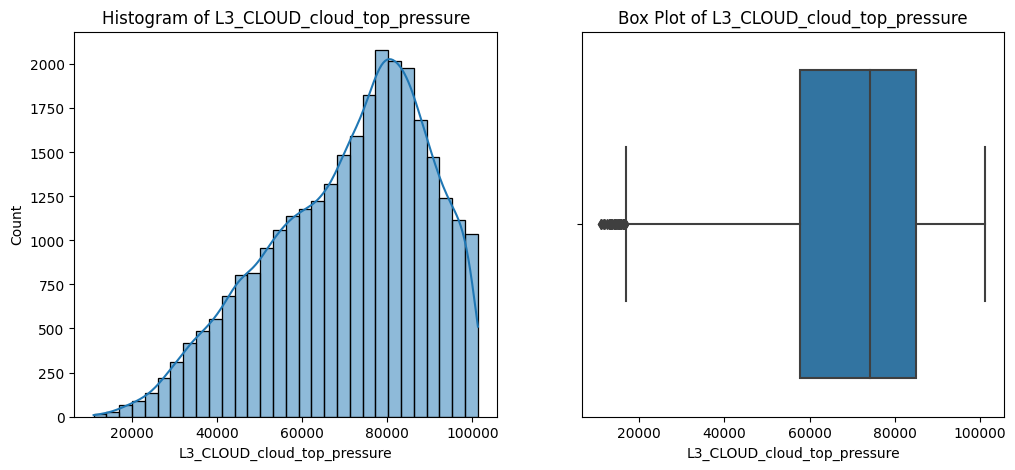

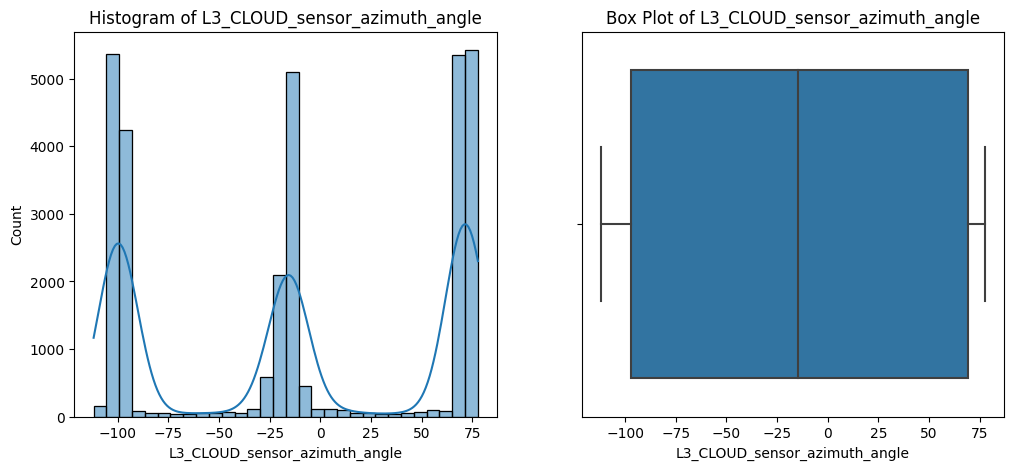

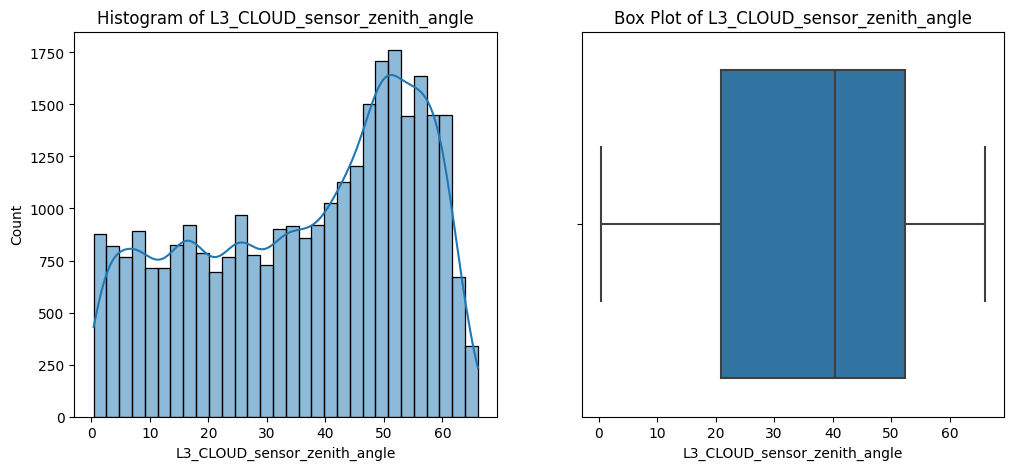

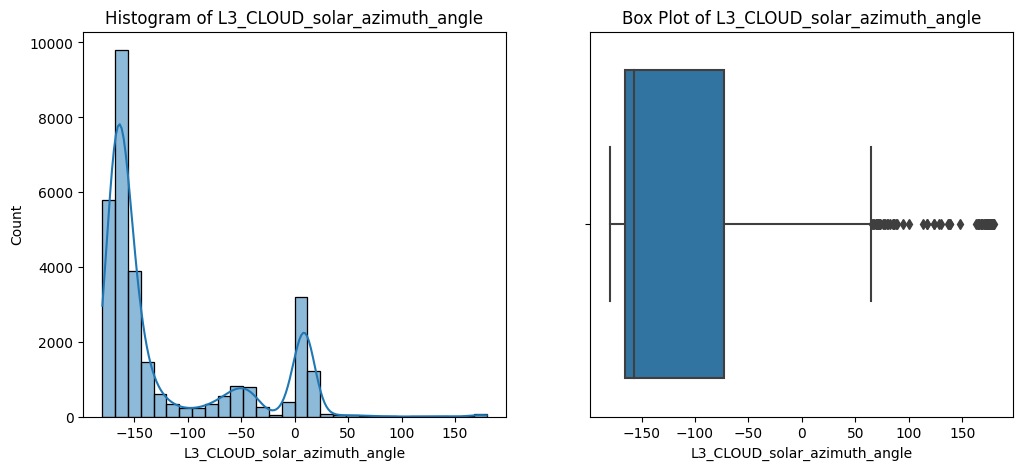

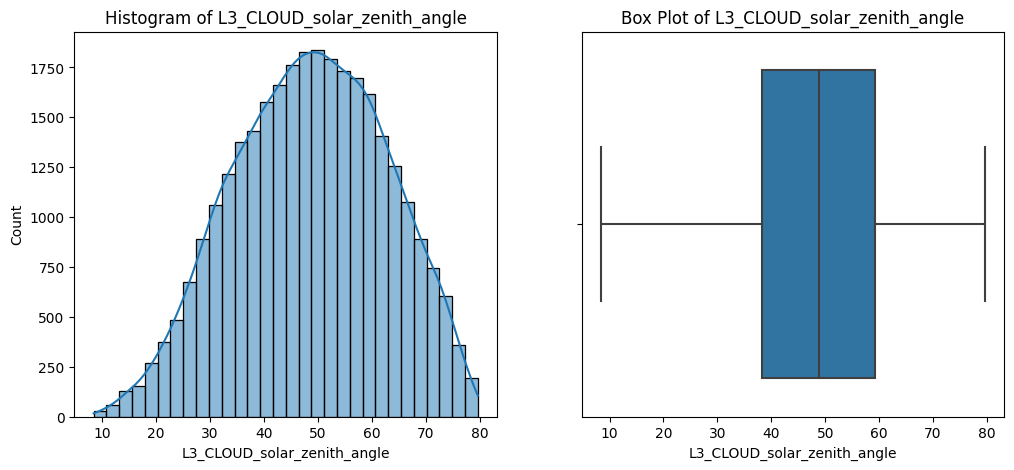

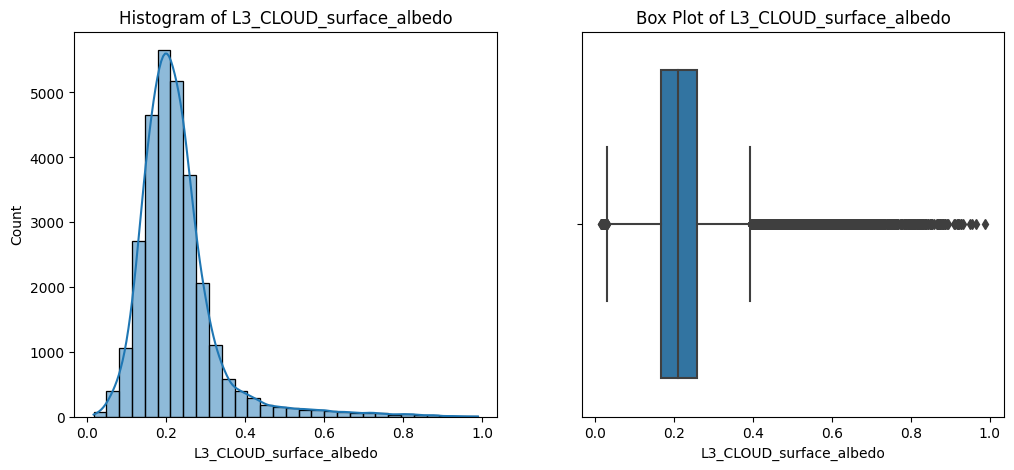

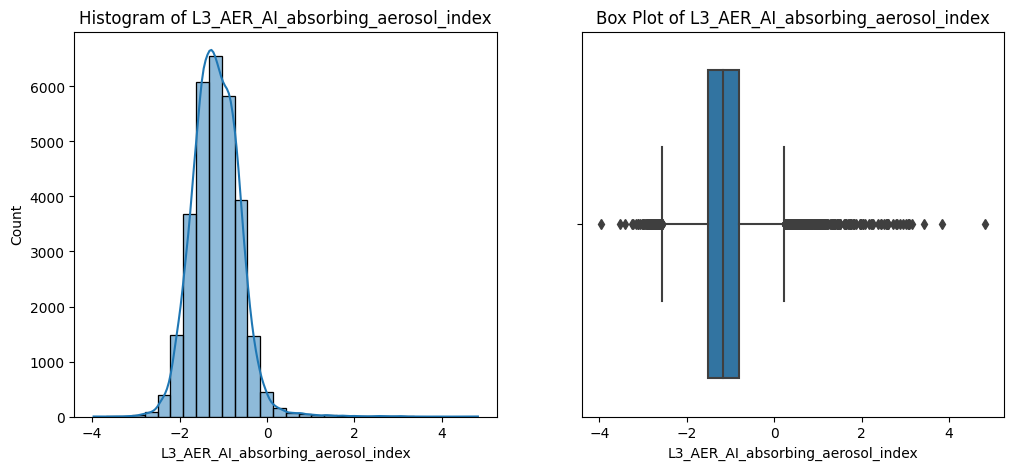

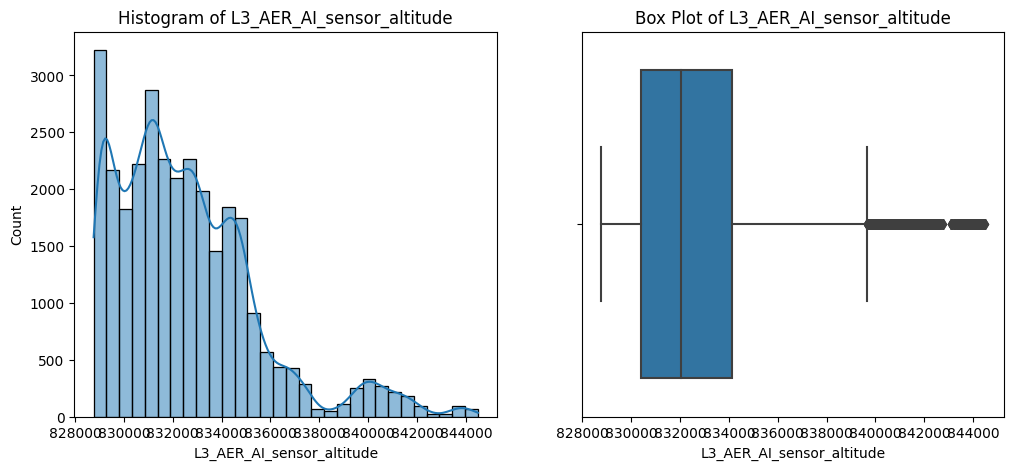

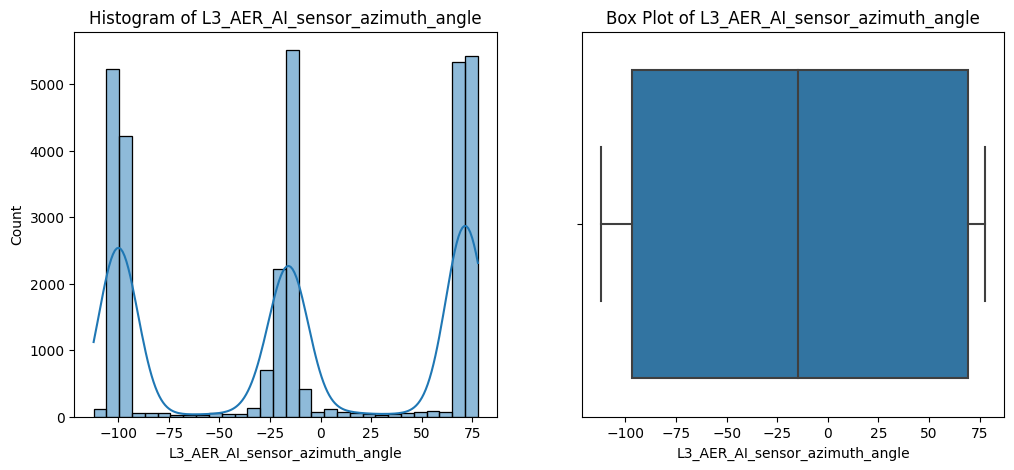

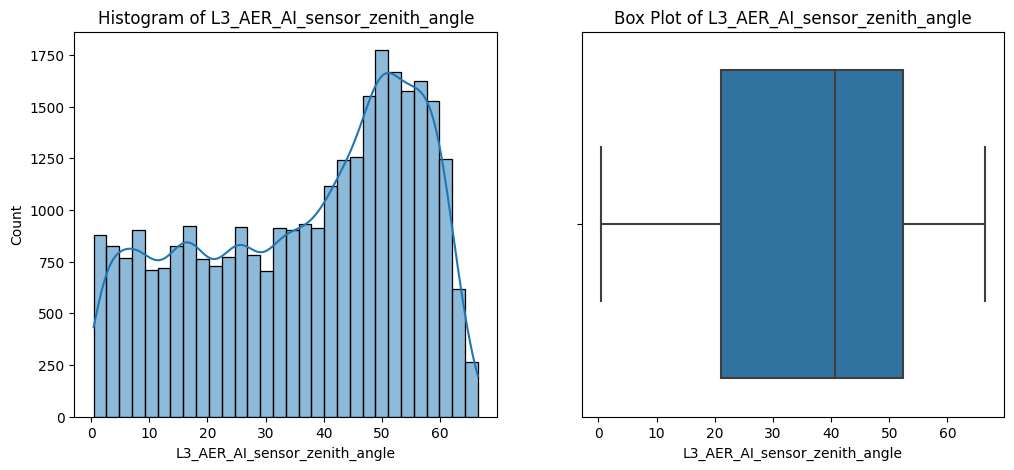

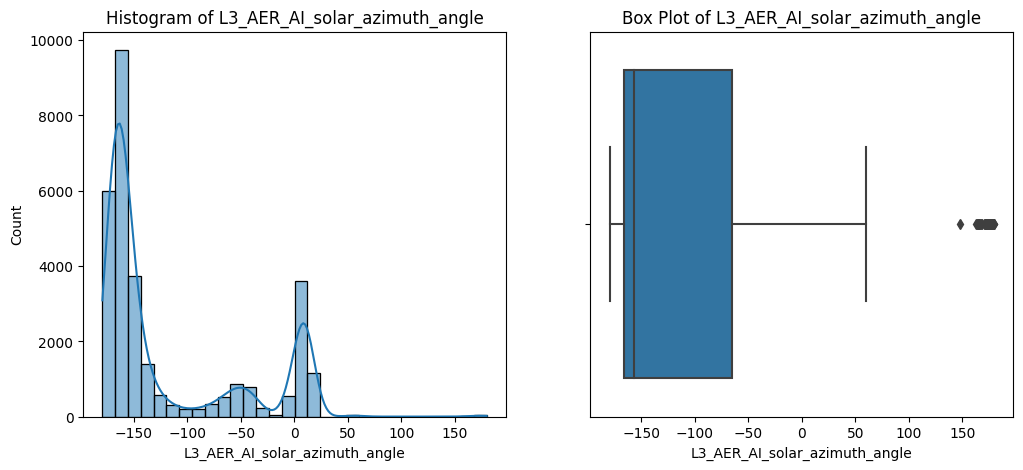

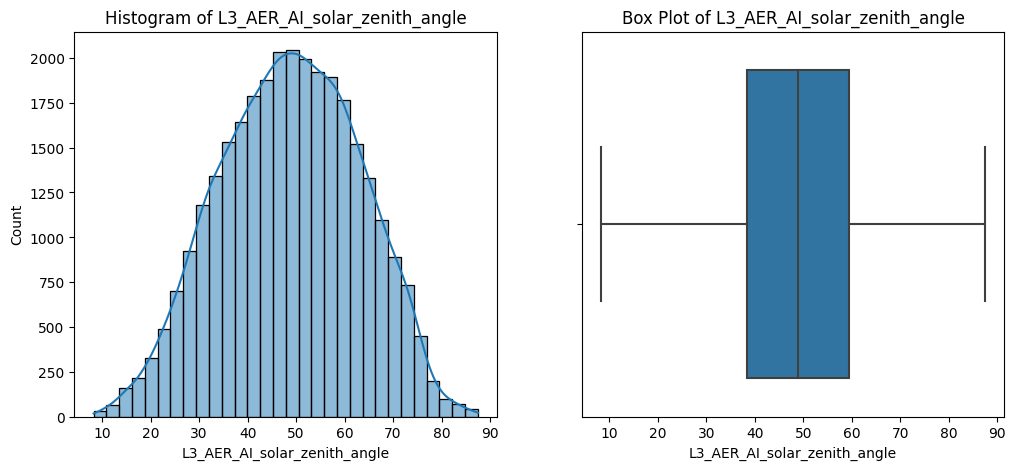

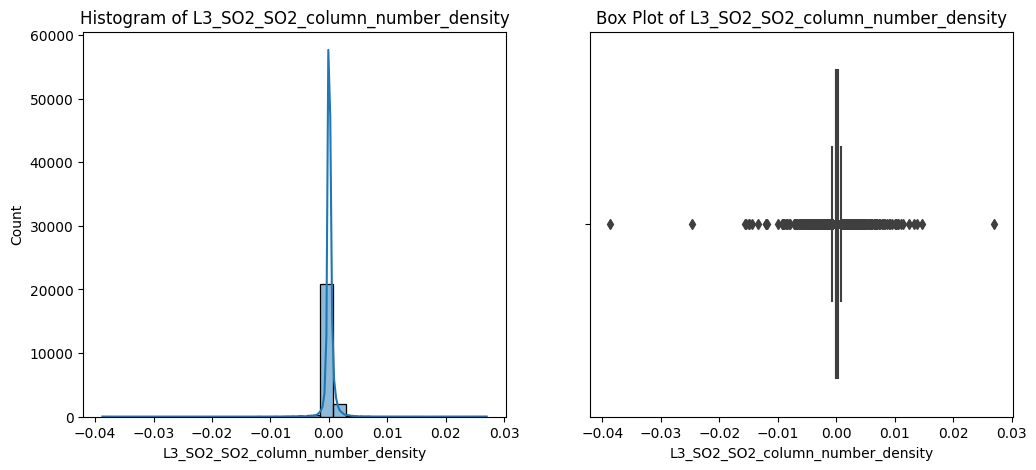

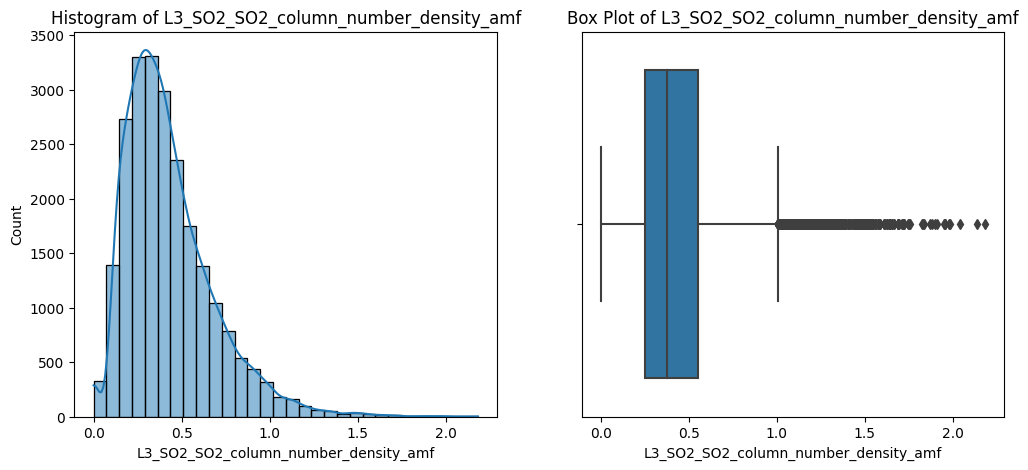

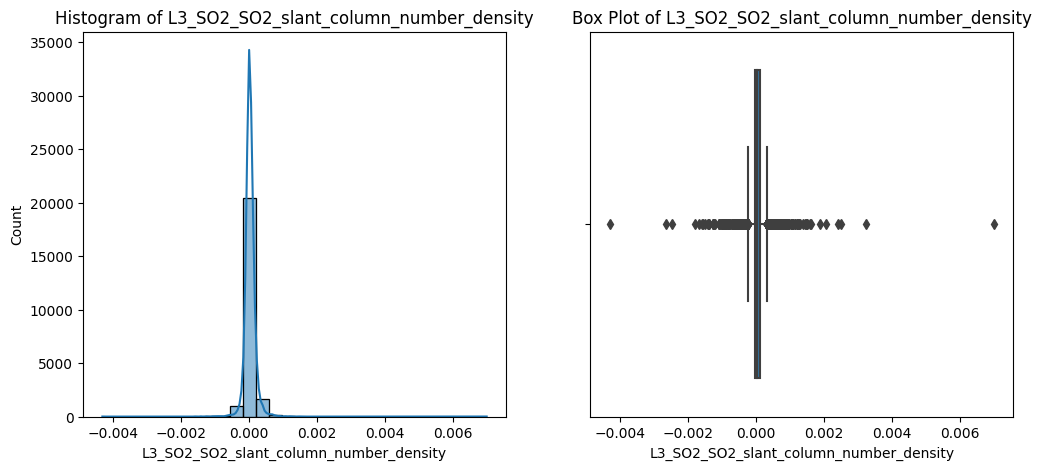

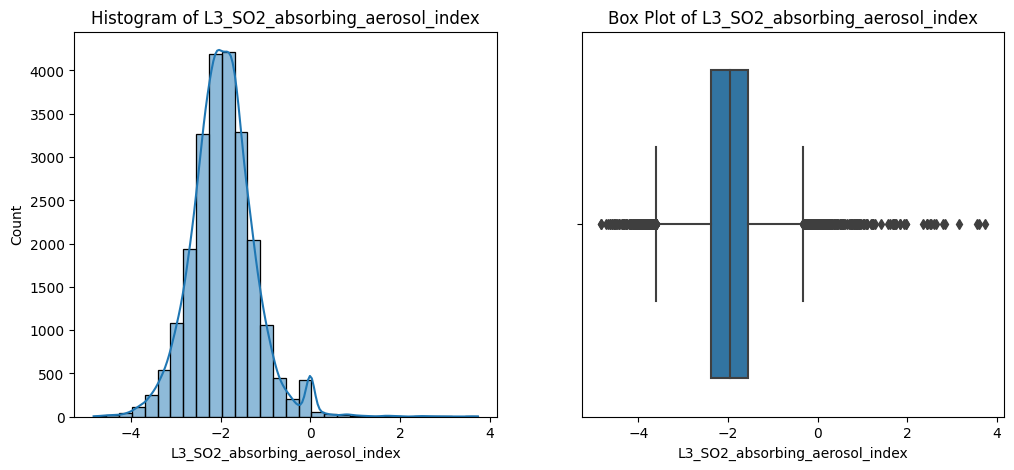

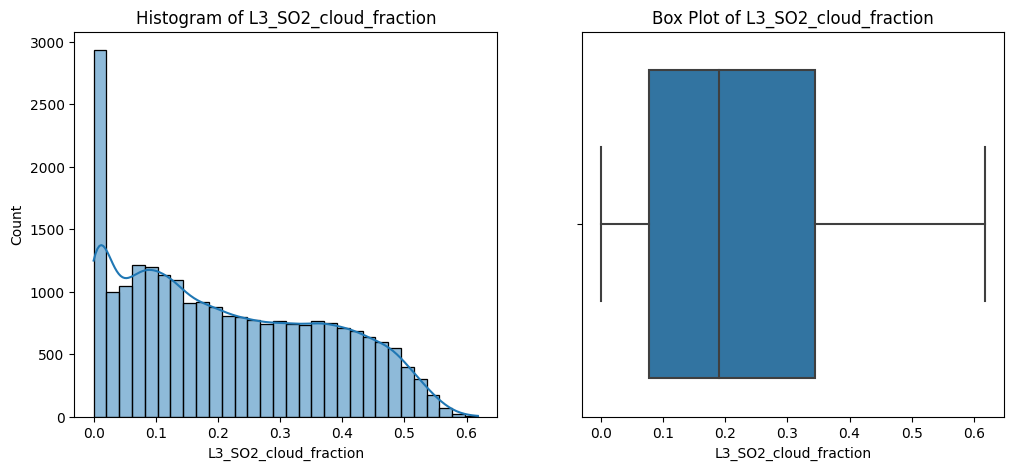

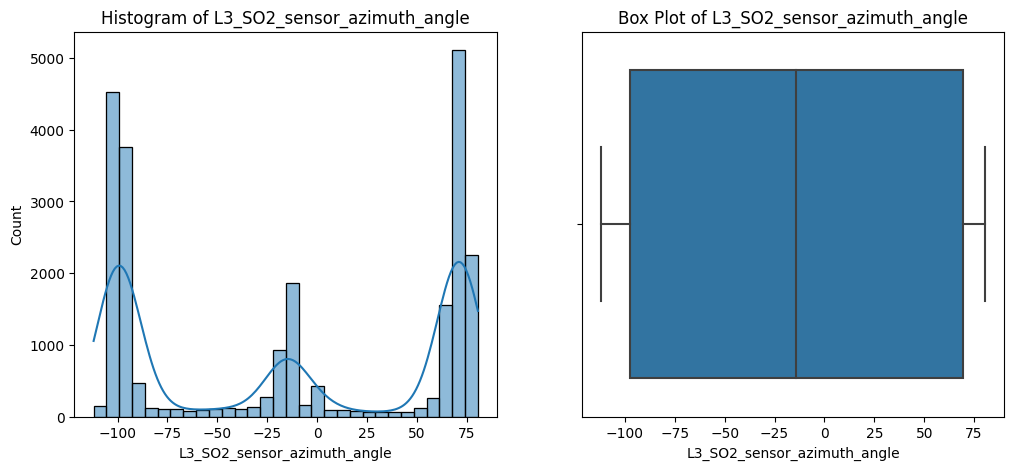

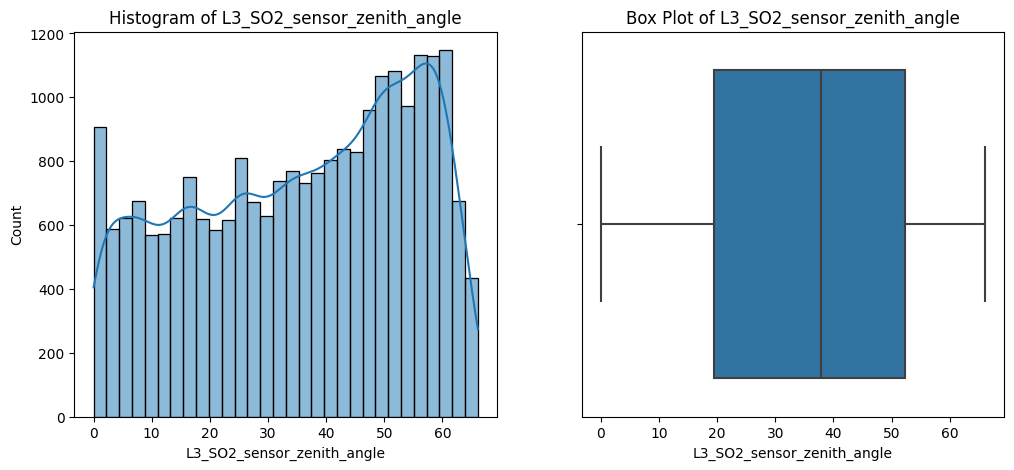

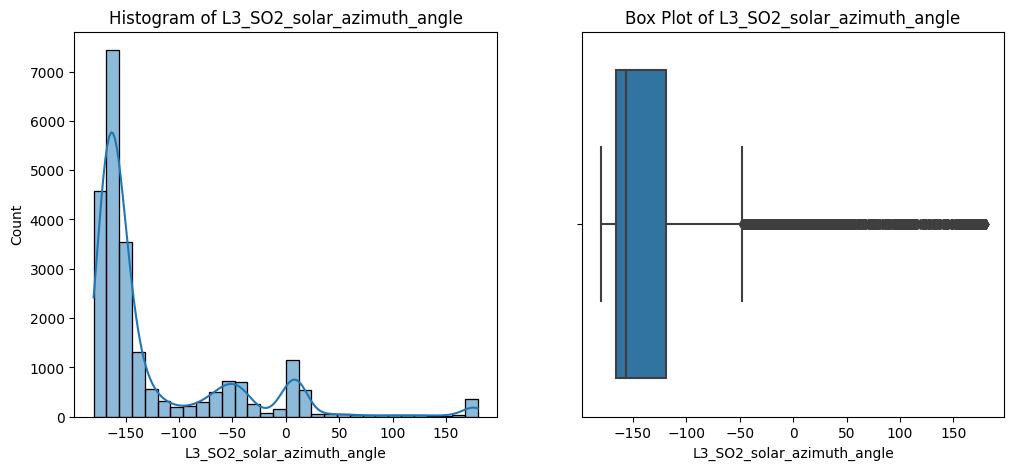

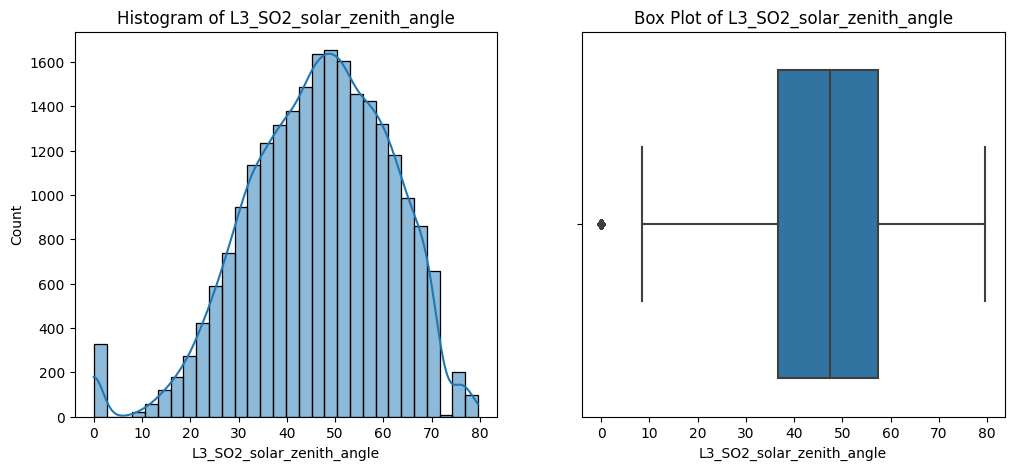

             target  precipitable_water_entire_atmosphere   
count  30535.000000                          30535.000000  \
mean      61.145302                             15.298102   
std       46.876568                             10.676039   
min        1.000000                              0.420044   
25%       25.000000                              7.669097   
50%       50.000000                             12.200000   
75%       80.000000                             19.900000   
max      815.000000                             72.599998   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
count                       30535.000000                       30535.000000  \
mean                           70.547271                           0.006003   
std                            18.810613                           0.003783   
min                             5.128572                           0.000139   
25%                            58.600002               

In [12]:
# Assuming df_cleaned is already defined and contains your data

# Step 1: Check for numerical columns
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Plot histograms and box plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    
    plt.show()

# Step 3: Calculate summary statistics
summary_stats = df_cleaned[numeric_cols].describe()
print(summary_stats)

In [13]:

# Assuming df_cleaned is already defined and contains your data

# Define the imputation strategies based on distribution analysis
strategies = {
    'target': None,  # No imputation needed
    'precipitable_water_entire_atmosphere': 'mean',  # Normally distributed
    'relative_humidity_2m_above_ground': 'mean',  # Typically normal distribution
    'specific_humidity_2m_above_ground': 'mean',  # Normal variation expected
    'temperature_2m_above_ground': 'mean',  # Central tendency is important
    'u_component_of_wind_10m_above_ground': 'mean',  # Normally distributed wind components
    'v_component_of_wind_10m_above_ground': 'mean',  # Same as u-component
    'L3_NO2_NO2_column_number_density': 'median',  # Likely skewed due to pollution spikes
    'L3_NO2_NO2_slant_column_number_density': 'median',  # Outliers present
    'L3_NO2_absorbing_aerosol_index': 'median',  # Sensitive to extreme values
    'L3_NO2_cloud_fraction': 'median',  # Typically binary presence
    'L3_NO2_sensor_altitude': 'median',  # Altitude values may be clustered
    'L3_NO2_sensor_azimuth_angle': 'median',  # Skewed data requires median
    'L3_NO2_sensor_zenith_angle': 'median',  # Protects against outliers
    'L3_NO2_solar_azimuth_angle': 'median',  # Similar reasoning
    'L3_NO2_solar_zenith_angle': 'median',  # Avoids skew
    'L3_NO2_stratospheric_NO2_column_number_density': 'median',  # High variability
    'L3_NO2_tropopause_pressure': 'median',  # Pressure can vary widely
    'L3_NO2_tropospheric_NO2_column_number_density': 'median',  # Extreme values
    'L3_O3_O3_column_number_density': 'median',  # Affected by environmental factors
    'L3_O3_O3_effective_temperature': 'median',  # Can be skewed
    'L3_O3_cloud_fraction': 'median',  # Central measure is important
    'L3_O3_sensor_azimuth_angle': 'median',  # Outliers can skew results
    'L3_O3_sensor_zenith_angle': 'median',  # Similar reasoning
    'L3_O3_solar_azimuth_angle': 'median',  # Protect against extremes
    'L3_O3_solar_zenith_angle': 'median',  # Avoids skew
    'L3_CO_CO_column_number_density': 'median',  # Pollution variability
    'L3_CO_H2O_column_number_density': 'median',  # Extreme values may exist
    'L3_CO_cloud_height': 'median',  # High variability
    'L3_CO_sensor_altitude': 'median',  # Clustered values
    'L3_CO_sensor_azimuth_angle': 'median',  # Affected by outliers
    'L3_CO_sensor_zenith_angle': 'median',  # Skewed distribution
    'L3_CO_solar_azimuth_angle': 'median',  # Similar reasoning
    'L3_CO_solar_zenith_angle': 'median',  # Protect against extremes
    'L3_HCHO_HCHO_slant_column_number_density': 'median',  # Environmental influences
    'L3_HCHO_cloud_fraction': 'median',  # Central measure is important
    'L3_HCHO_sensor_azimuth_angle': 'median',  # Outliers can skew results
    'L3_HCHO_sensor_zenith_angle': 'median',  # Avoids skew
    'L3_HCHO_solar_azimuth_angle': 'median',  # Protect against extremes
    'L3_HCHO_solar_zenith_angle': 'median',  # Similar reasoning
    'L3_HCHO_tropospheric_HCHO_column_number_density': 'median',  # High variability
    'L3_HCHO_tropospheric_HCHO_column_number_density_amf': 'median',  # High variability
    'L3_CLOUD_cloud_base_height': 'median',  # Skewed data expected
    'L3_CLOUD_cloud_base_pressure': 'median',  # Can vary widely
    'L3_CLOUD_cloud_optical_depth': 'median',  # Sensitive to extreme values
    'L3_CLOUD_cloud_top_height': 'median',  # Similar reasoning
    'L3_CLOUD_cloud_top_pressure': 'median',  # High variability
    'L3_CLOUD_surface_albedo': 'median',  # Skewed data expected
    'L3_AER_AI_absorbing_aerosol_index': 'median',  # Outlier protection
    'L3_AER_AI_sensor_altitude': 'median',  # Clustered values
    'L3_AER_AI_sensor_azimuth_angle': 'median',  # Affected by outliers
    'L3_AER_AI_sensor_zenith_angle': 'median',  # Avoids skew
    'L3_AER_AI_solar_azimuth_angle': 'median',  # Protect against extremes
    'L3_AER_AI_solar_zenith_angle': 'median',  # Similar reasoning
    'L3_SO2_SO2_column_number_density': 'median',  # High variability
    'L3_SO2_SO2_column_number_density_amf': 'median',  # High variability
    'L3_SO2_SO2_slant_column_number_density': 'median',  # Sensitive to extreme values
    'L3_SO2_absorbing_aerosol_index': 'median',  # Outlier protection
    'L3_SO2_cloud_fraction': 'median',  # Central measure is important
    'L3_SO2_sensor_azimuth_angle': 'median',  # Affected by outliers
    'L3_SO2_sensor_zenith_angle': 'median',  # Avoids skew
    'L3_SO2_solar_azimuth_angle': 'median',  # Protect against extremes
    'L3_SO2_solar_zenith_angle': 'median',  # Similar reasoning
}

# Step 3: Apply the imputation function to each group
grouped = df_cleaned.groupby('Place_ID')

def impute_with_strategies(group):
    for col, strategy in strategies.items():
        if strategy is not None and col in group.columns:  # Check if the column is present
            if strategy == 'mean':
                group[col].fillna(group[col].mean(), inplace=True)
            elif strategy == 'median':
                group[col].fillna(group[col].median(), inplace=True)

    return group

# Apply the imputation function to each group
df_imputed = grouped.apply(impute_with_strategies)

# Check remaining NaN values after imputation
remaining_nans = df_imputed.isna().sum()
print("Remaining NaNs after imputation:\n", remaining_nans)

# Optionally check specific columns for any remaining NaNs
columns_to_check = df_imputed.columns[df_imputed.isna().any()].tolist()
print("Columns with remaining NaNs:\n", columns_to_check)


Remaining NaNs after imputation:
 Date                                                     0
Place_ID                                                 0
target                                                   0
precipitable_water_entire_atmosphere                     0
relative_humidity_2m_above_ground                        0
specific_humidity_2m_above_ground                        0
temperature_2m_above_ground                              0
u_component_of_wind_10m_above_ground                     0
v_component_of_wind_10m_above_ground                     0
L3_NO2_NO2_column_number_density                         0
L3_NO2_NO2_slant_column_number_density                   0
L3_NO2_absorbing_aerosol_index                           0
L3_NO2_cloud_fraction                                    0
L3_NO2_sensor_altitude                                   0
L3_NO2_sensor_azimuth_angle                              0
L3_NO2_sensor_zenith_angle                               0
L3_NO2_solar_azimuth_a

The presence of remaining NaN values in the columns related to cloud measurements indicates that some groups defined by Place_ID do not have sufficient data to compute the mean or median. Here’s a step-by-step approach to diagnose the situation and resolve the remaining NaNs:

In [28]:
# Step 1: Identify the columns with remaining NaNs
nan_columns = ['L3_CLOUD_cloud_fraction', 'L3_CLOUD_sensor_azimuth_angle', 
                'L3_CLOUD_sensor_zenith_angle', 'L3_CLOUD_solar_azimuth_angle', 
                'L3_CLOUD_solar_zenith_angle']

# Step 2: Group by 'Place_ID' and count entries for each column of interest
group_sizes = df_cleaned.groupby('Place_ID')[nan_columns].count()

# Step 3: Identify groups with insufficient data
insufficient_data_groups = group_sizes[group_sizes < 3]  # Adjust the threshold as needed
print("Groups with insufficient data for imputation:")
print(insufficient_data_groups)

# Optional: You can also count unique values to better understand the situation
unique_counts = df_cleaned.groupby('Place_ID').size()
print("\nUnique counts of observations for each Place_ID:")
print(unique_counts)


Groups with insufficient data for imputation:
          L3_CLOUD_cloud_fraction  L3_CLOUD_sensor_azimuth_angle   
Place_ID                                                           
010Q650                       NaN                            NaN  \
05EC30X                       NaN                            NaN   
0DPWHX8                       NaN                            NaN   
0GBXTHY                       NaN                            NaN   
0HYPV1N                       NaN                            NaN   
0I2XREH                       NaN                            NaN   
0KV6RJ1                       NaN                            NaN   
0MGEY68                       NaN                            NaN   
0O9R6AD                       NaN                            NaN   
0PP73FZ                       NaN                            NaN   
0RYZQUU                       NaN                            NaN   
0TFOCOS                       NaN                            NaN   
0T

In [29]:
# Check for NaNs in the L3_CLOUD_cloud_fraction column by Place_ID
nan_groups = df_imputed[df_imputed['L3_CLOUD_cloud_fraction'].isna()]['Place_ID'].value_counts()

# Display groups with NaNs in L3_CLOUD_cloud_fraction
nan_groups_summary = nan_groups[nan_groups > 0]
nan_groups_summary_count = nan_groups_summary.count()

print("Groups with NaNs in L3_CLOUD_cloud_fraction:")
print(nan_groups_summary)
print(f"\nTotal groups with NaN entries: {nan_groups_summary_count}")

Groups with NaNs in L3_CLOUD_cloud_fraction:
Place_ID
7DRFQCK    37
0GBXTHY    33
92A8XLV    24
YAQHNNY    21
PHOW9EM    21
S5THXEQ    19
I6718VY    10
RW9SZRD     5
1PRBF5P     5
FUTHSQ2     2
JY4I65T     2
28OSFYU     2
1ZBVIMD     2
YWSFY6Q     2
I6VIR8R     2
0HYPV1N     2
168B2T2     2
TKTT8QV     2
PCEC7FM     1
NMX4N9O     1
NW6MZ2E     1
OCJ6GWU     1
OU23QHQ     1
Q9LESDG     1
PA1M3UV     1
NKXVNIW     1
QNLDXFV     1
QENS5WN     1
PWER8U4     1
Q17XPXH     1
QO3SZZ5     1
Q2F2SPS     1
Q724ZY2     1
RFQQX9G     1
KZJQU9F     1
NCIFTFE     1
M53IXJM     1
HNXHLWA     1
HPOVPNA     1
HRUE894     1
HSXRMLA     1
I5RGE5G     1
IJKTQ0G     1
IST2SPS     1
IXVOHYQ     1
J3HFUPO     1
J8IR9R2     1
JID7N54     1
JK1Y6T7     1
JSXAVKO     1
KRT9EQD     1
KYNZWCA     1
L17O89H     1
LF5EAJD     1
LSK9OJP     1
M17FYGT     1
RPUU1F6     1
S9GAHFC     1
RWKDYP8     1
UF34PPS     1
UUAY1R8     1
V16MEEV     1
V18LR2F     1
V2J713I     1
V9H35TO     1
VHZ9CYS     1
VPEDEBQ     1
VQ64B9Z 

In [32]:
# Step 1: Reset the index to avoid ambiguity, dropping the index column
df_imputed_reset = df_imputed.reset_index(drop=True)

# Step 2: Identify groups with 10 or more NaNs for L3_CLOUD_cloud_fraction
nan_counts = df_imputed_reset.groupby('Place_ID')['L3_CLOUD_cloud_fraction'].apply(lambda x: x.isna().sum())

# Step 3: Get the Place_IDs that have 10 or more NaNs
groups_to_drop = nan_counts[nan_counts >= 10].index

# Step 4: Drop these groups from the DataFrame
df_filtered = df_imputed_reset[~df_imputed_reset['Place_ID'].isin(groups_to_drop)]

# Step 5: Impute remaining NaNs in L3_CLOUD_cloud_fraction for the filtered DataFrame
# Impute with the median for the remaining groups
median_value = df_filtered['L3_CLOUD_cloud_fraction'].median()
df_filtered['L3_CLOUD_cloud_fraction'].fillna(median_value, inplace=True)

# Check the number of remaining NaNs
remaining_nans = df_filtered['L3_CLOUD_cloud_fraction'].isna().sum()
print(f"Remaining NaNs in L3_CLOUD_cloud_fraction: {remaining_nans}")

# Optionally, check how many groups are left
remaining_groups = df_filtered['Place_ID'].nunique()
print(f"Total groups remaining: {remaining_groups}")


Remaining NaNs in L3_CLOUD_cloud_fraction: 0
Total groups remaining: 330


Consider Dropping Groups or Columns: Since many groups are affected and dropping these groups would reduce your dataset significantly, you might consider dropping the affected columns instead, especially if:

In [33]:
# Columns to drop based on insufficient data
columns_to_drop = [
    'L3_CLOUD_sensor_azimuth_angle', 
    'L3_CLOUD_sensor_zenith_angle', 
    'L3_CLOUD_solar_azimuth_angle', 
    'L3_CLOUD_solar_zenith_angle'
]

# Drop the specified columns from the current DataFrame
df_filtered.drop(columns=columns_to_drop, inplace=True)

# Verify the columns have been dropped
print("Remaining columns after dropping:")
print(df_filtered.columns)


Remaining columns after dropping:
Index(['Date', 'Place_ID', 'target', 'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',


In [34]:
df_filtered.head(1)

,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,log_target
0,2020-01-02,010Q650,38.0,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,2077.870642,80225.840895,0.0,5.014178,2832.82268,72851.671521,0.245345,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,3.637586


In [35]:
# Check for NaNs
nan_summary = df_filtered.isna().sum()

# Check for zeros
zero_summary = (df_filtered == 0).sum()

# Combine results into a single DataFrame for easier visualization
nan_zero_summary = pd.DataFrame({
    'NaN Count': nan_summary,
    'Zero Count': zero_summary
})

# Display only columns with NaNs or Zeros
result_summary = nan_zero_summary[(nan_zero_summary['NaN Count'] > 0) | (nan_zero_summary['Zero Count'] > 0)]
print("Columns with NaNs or Zeros:")
print(result_summary)

Columns with NaNs or Zeros:
                                                    NaN Count  Zero Count
L3_NO2_NO2_column_number_density                            0        2553
L3_NO2_NO2_slant_column_number_density                      0        2553
L3_NO2_absorbing_aerosol_index                              0        2553
L3_NO2_cloud_fraction                                       0        2839
L3_NO2_sensor_altitude                                      0        2553
L3_NO2_sensor_azimuth_angle                                 0        3098
L3_NO2_sensor_zenith_angle                                  0        2553
L3_NO2_solar_azimuth_angle                                  0        2598
L3_NO2_solar_zenith_angle                                   0        2553
L3_NO2_stratospheric_NO2_column_number_density              0        2553
L3_NO2_tropopause_pressure                                  0        2553
L3_NO2_tropospheric_NO2_column_number_density               0        2553
L3_O3_O3_c

In [36]:
# Create log_target column
df_filtered['log_target'] = np.where(df_filtered['target'] > 0, 
                                      np.log(df_filtered['target']), 
                                      np.nan)  # Set to NaN if target is not positive

df_filtered.head(1)

,Date,Place_ID,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,log_target
0,2020-01-02,010Q650,38.0,11.0,60.200001,0.00804,18.51684,1.996377,-1.227395,0.000074,0.000156,-1.23133,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.0,76.536426,38.593017,-61.752587,22.363665,0.02108,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.00001,0.0,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,2077.870642,80225.840895,0.0,5.014178,2832.82268,72851.671521,0.245345,-1.23133,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.00004,-1.861476,0.0,76.536426,38.593017,-61.752587,22.363665,3.637586


In [37]:
# Step 1: Select only numeric columns for correlation from df_filtered
numeric_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 2: Calculate the correlation matrix for numerical features
correlation_matrix = df_filtered[numeric_cols].corr()

# Step 3: Identify multicollinear features
# Exclude 'target' and 'log_target'
features_to_check = correlation_matrix.drop(['target', 'log_target'], axis=1)

# Create a set to keep track of features to drop
features_to_drop = set()

# Step 4: Iterate over the correlation matrix
for i in range(len(features_to_check.columns)):
    for j in range(i):
        if abs(features_to_check.iloc[i, j]) > 0.9:  # Check for correlation above 0.9
            colname = features_to_check.columns[i]
            other_colname = features_to_check.columns[j]

            # Determine which feature to drop based on correlation with target
            if abs(correlation_matrix['target'][colname]) < abs(correlation_matrix['target'][other_colname]):
                features_to_drop.add(colname)  # Drop colname
            else:
                features_to_drop.add(other_colname)  # Drop other_colname

# Step 5: Drop the identified features from df_filtered
df_reduced = df_filtered.drop(columns=features_to_drop)

# Step 6: Check the remaining features
print("Dropped features due to multicollinearity:", features_to_drop)
print("Remaining features:\n", df_reduced.columns)


Dropped features due to multicollinearity: {'L3_SO2_SO2_column_number_density_amf', 'L3_NO2_solar_zenith_angle', 'L3_O3_sensor_zenith_angle', 'L3_O3_solar_zenith_angle', 'L3_CO_H2O_column_number_density', 'L3_HCHO_sensor_azimuth_angle', 'L3_HCHO_solar_zenith_angle', 'L3_SO2_sensor_zenith_angle', 'L3_CLOUD_cloud_base_height', 'L3_HCHO_sensor_zenith_angle', 'L3_SO2_solar_zenith_angle', 'v_component_of_wind_10m_above_ground', 'L3_CO_sensor_zenith_angle', 'L3_CO_sensor_altitude', 'L3_O3_sensor_azimuth_angle', 'L3_AER_AI_sensor_zenith_angle', 'L3_CO_solar_zenith_angle', 'L3_O3_O3_column_number_density', 'L3_AER_AI_solar_zenith_angle', 'L3_NO2_sensor_altitude', 'precipitable_water_entire_atmosphere', 'L3_CLOUD_cloud_top_height', 'L3_SO2_sensor_azimuth_angle', 'L3_NO2_stratospheric_NO2_column_number_density', 'L3_SO2_SO2_slant_column_number_density', 'L3_SO2_cloud_fraction', 'L3_HCHO_cloud_fraction', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf', 'L3_NO2_tropopause_pressure', 'L3_NO2_

In [38]:
df_reduced.head(1)

,Date,Place_ID,target,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_solar_azimuth_angle,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_solar_azimuth_angle,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_CO_sensor_azimuth_angle,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_absorbing_aerosol_index,L3_SO2_solar_azimuth_angle,log_target
0,2020-01-02,010Q650,38.0,60.200001,1.996377,0.000156,0.006507,-61.736719,0.000017,-61.752587,0.02108,267.017184,74.543393,-61.789016,-0.00001,-61.752587,0.000064,5.014178,72851.671521,840209.874619,-61.736719,-1.861476,-61.752587,3.637586


In [39]:
df_reduced.dtypes

Date                                               datetime64[ns]
Place_ID                                                   object
target                                                    float64
relative_humidity_2m_above_ground                         float64
u_component_of_wind_10m_above_ground                      float64
L3_NO2_NO2_slant_column_number_density                    float64
L3_NO2_cloud_fraction                                     float64
L3_NO2_solar_azimuth_angle                                float64
L3_NO2_tropospheric_NO2_column_number_density             float64
L3_O3_solar_azimuth_angle                                 float64
L3_CO_CO_column_number_density                            float64
L3_CO_cloud_height                                        float64
L3_CO_sensor_azimuth_angle                                float64
L3_CO_solar_azimuth_angle                                 float64
L3_HCHO_HCHO_slant_column_number_density                  float64
L3_HCHO_so

In [40]:
# Step 1: Check for NaNs in the df_reduced DataFrame
nan_summary = df_reduced.isna().sum()

# Step 2: Display columns with NaNs
print("Columns with NaNs in df_reduced:")
print(nan_summary[nan_summary > 0])

# Step 3: (Optional) If there are NaNs, check the rows with NaNs
if nan_summary.any() > 0:
    nan_rows = df_reduced[df_reduced.isna().any(axis=1)]
    print("\nRows with NaNs in df_reduced:")
    print(nan_rows)

Columns with NaNs in df_reduced:
Series([], dtype: int64)


Model Building

1. Baseline Mean

2. Feature Regression
Standard Scaling

3. Log_Target

In [41]:


# Assuming 'Date' is a datetime column in df_reduced
df_reduced['Date'] = pd.to_datetime(df_reduced['Date'])

# Step 1: Initialize train and test DataFrames
train_df = pd.DataFrame()
test_df = pd.DataFrame()

# Step 2: Group by Place_ID
grouped = df_reduced.groupby('Place_ID')

# Step 3: Iterate through each group
for name, group in grouped:
    # Step 4: Sort by date
    group = group.sort_values('Date')
    
    # Step 5: Split into test and train sets
    test_data = group.tail(3)  # Get the last 3 entries for test set
    train_data = group.head(len(group) - 3)  # Get the rest for the train set

    # Step 6: Append to the respective DataFrames
    test_df = pd.concat([test_df, test_data])
    train_df = pd.concat([train_df, train_data])

# Resetting the index for both train and test DataFrames
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Check the result
print("Train set size:", train_df.shape)
print("Test set size:", test_df.shape)

# Optional: Display the first few rows of each DataFrame
print("\nTrain DataFrame head:")
print(train_df.head())

print("\nTest DataFrame head:")
print(test_df.head())


Train set size: (28898, 24)
Test set size: (990, 24)

Train DataFrame head:
        Date Place_ID  target  relative_humidity_2m_above_ground   
0 2020-01-02  010Q650    38.0                          60.200001  \
1 2020-01-03  010Q650    39.0                          48.799999   
2 2020-01-04  010Q650    24.0                          33.400002   
3 2020-01-05  010Q650    49.0                          21.300001   
4 2020-01-06  010Q650    21.0                          44.700001   

   u_component_of_wind_10m_above_ground   
0                              1.996377  \
1                              3.330430   
2                              5.065727   
3                              3.004001   
4                              2.621787   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_cloud_fraction   
0                                0.000156               0.006507  \
1                                0.000197               0.018360   
2                                0.000170           

Explanation:
Datetime Conversion: Ensures the Date column is in datetime format for accurate sorting.
Group and Iterate: Groups the data by Place_ID and iterates through each group.
Sorting: Each group is sorted by the Date.
Splitting Data: The last three entries are taken as the test set, and the rest are assigned to the training set.
Concatenation: The individual train and test sets for each group are concatenated into a single DataFrame.

In [46]:
unique_groups_train = train_df['Place_ID'].nunique()
print("Number of unique groups (Place_ID) in train_df:", unique_groups_train)

Number of unique groups (Place_ID) in train_df: 330


In [47]:
# Check the number of entries per group in the test set
test_group_counts = test_df['Place_ID'].value_counts()
print("Number of entries per Place_ID in test_df:")
print(test_group_counts)

# Count the unique groups in the test set
unique_groups_test = test_df['Place_ID'].nunique()
print("Number of unique groups (Place_ID) in test_df:", unique_groups_test)

Number of entries per Place_ID in test_df:
Place_ID
010Q650    3
NMX4N9O    3
NJ1G8AW    3
NHB348L    3
NCIFTFE    3
N5RI4GT    3
MUJVVNA    3
ME8O4BV    3
M53IXJM    3
M17FYGT    3
LXRFONN    3
LVBKULK    3
LSK9OJP    3
LKE9VQB    3
LF5EAJD    3
LBFYBY5    3
L686B2W    3
L17O89H    3
KZJQU9F    3
NKXVNIW    3
NW6MZ2E    3
QNLDXFV    3
OCJ6GWU    3
QHM3GGJ    3
QFNUGSK    3
QENS5WN    3
Q9LESDG    3
Q724ZY2    3
Q2F2SPS    3
Q17XPXH    3
Q0IXA5X    3
PWER8U4    3
PJ8AOXN    3
PCGUGKH    3
PCEC7FM    3
PA1M3UV    3
P0TB067    3
OU23QHQ    3
OEN2305    3
OE6VS93    3
KYNZWCA    3
KXX7F64    3
KRT9EQD    3
KB7LD9K    3
HRUE894    3
HR0OKCA    3
HPOVPNA    3
HNXHLWA    3
HN3YMTM    3
HFRRK3M    3
HCGAOBY    3
H7QOMTD    3
H6JSAYZ    3
H2FJ6F6    3
GU2Z4N6    3
GSIMFXX    3
GR52CEZ    3
GP8V3PO    3
GNHAWDW    3
GLPQ01R    3
GJOPSKI    3
HSXRMLA    3
I5RGE5G    3
I6VIR8R    3
J4UZBX3    3
JY4I65T    3
JSXAVKO    3
JRPE3E8    3
JK1Y6T7    3
JID7N54    3
JABMGKI    3
J8IR9R2    3
J3HFUPO    3

In [43]:
test_df.head(1)

,Date,Place_ID,target,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_solar_azimuth_angle,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_solar_azimuth_angle,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_CO_sensor_azimuth_angle,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_absorbing_aerosol_index,L3_SO2_solar_azimuth_angle,log_target
0,2020-04-02,010Q650,59.0,32.600002,2.669397,0.0,0.0,0.0,0.0,-49.984656,0.021509,239.258071,-13.671003,-50.002454,0.000045,-49.984656,0.000143,4.132446,53938.075667,840047.183461,-28.740996,-1.423405,-49.984656,4.077537


In [48]:
# Assuming train_df and test_df are already defined as per your previous code

# Step 1: Calculate the mean target for each group in the training set
mean_predictions = train_df.groupby('Place_ID')['target'].mean().reset_index()
mean_predictions.columns = ['Place_ID', 'mean_target']

# Step 2: Merge the mean predictions with the test DataFrame
test_df = test_df.merge(mean_predictions, on='Place_ID', how='left')

# Step 3: Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_df['target'], test_df['mean_target']))

# Output the RMSE and a preview of the test DataFrame with predictions
print("Root Mean Squared Error of the baseline model:", rmse)
print("Test DataFrame with predictions:")
print(test_df[['Place_ID', 'Date', 'target', 'mean_target']].head())

Root Mean Squared Error of the baseline model: 24.505861843200883
Test DataFrame with predictions:
  Place_ID       Date  target  mean_target
0  010Q650 2020-04-02    59.0    36.472527
1  010Q650 2020-04-03    61.0    36.472527
2  010Q650 2020-04-04    45.0    36.472527
3  05EC30X 2020-04-02    13.0    39.896552
4  05EC30X 2020-04-03    17.0    39.896552


In [49]:
train_df.head(1)

,Date,Place_ID,target,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_solar_azimuth_angle,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_solar_azimuth_angle,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_CO_sensor_azimuth_angle,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_absorbing_aerosol_index,L3_SO2_solar_azimuth_angle,log_target
0,2020-01-02,010Q650,38.0,60.200001,1.996377,0.000156,0.006507,-61.736719,0.000017,-61.752587,0.02108,267.017184,74.543393,-61.789016,-0.00001,-61.752587,0.000064,5.014178,72851.671521,840209.874619,-61.736719,-1.861476,-61.752587,3.637586


In [51]:

# Separate features and target from train_df
X_train = train_df.drop(columns=['target', 'log_target', 'Date', 'Place_ID'])  # Adjust based on your DataFrame
y_train = train_df['target']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions on the training data (for evaluation)
y_train_pred = model.predict(X_train_scaled)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error of the linear regression model on training data:", train_rmse)


Root Mean Squared Error of the linear regression model on training data: 38.83019456032941


In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions on the training data
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Calculate RMSE for Random Forest
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
print("Root Mean Squared Error of the Random Forest model on training data:", train_rmse_rf)


Root Mean Squared Error of the Random Forest model on training data: 11.845647077640212


In [53]:

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages to be run
    learning_rate=0.1,   # Step size shrinkage
    max_depth=6,         # Maximum depth of the individual regression estimators
    random_state=42      # For reproducibility
)

# Fit the model
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred_gbr = gbr.predict(X_test)

# Calculate RMSE
test_rmse_gbr = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr))
print("Root Mean Squared Error of the Gradient Boosting model on test data:", test_rmse_gbr)


Root Mean Squared Error of the Gradient Boosting model on test data: 26.20834651736669


In [57]:
# Assuming X_train, X_test are your original features, and y_train is your target

# Step 1: Get predictions from each model
mean_predictions_train = np.mean(y_train) * np.ones_like(y_train)
mean_predictions_test = np.mean(y_test) * np.ones_like(y_test)

rf_predictions_train = rf_model.predict(X_train)  # Predictions from Random Forest
rf_predictions_test = rf_model.predict(X_test)

gbr_predictions_train = gbr.predict(X_train)  # Predictions from Gradient Boosting
gbr_predictions_test = gbr.predict(X_test)

# Removed the Linear Regression predictions since we are not using it

# Step 2: Create a new DataFrame for the meta-model
meta_train = pd.DataFrame({
    'mean': mean_predictions_train,
    'rf': rf_predictions_train,
    'gbr': gbr_predictions_train,
    # 'lr': lr_predictions_train,  # Removed Linear Regression predictions
    'target': y_train  # Keep the target for training the meta-model
})

meta_test = pd.DataFrame({
    'mean': mean_predictions_test,
    'rf': rf_predictions_test,
    'gbr': gbr_predictions_test,
    # 'lr': lr_predictions_test  # Removed Linear Regression predictions
})

# Step 3: Train a meta-model
meta_model = LinearRegression()  # You can choose to keep this or replace it with another model
meta_model.fit(meta_train.drop(columns=['target']), meta_train['target'])

# Step 4: Make predictions on the test set
final_predictions = meta_model.predict(meta_test)

# Step 5: Calculate RMSE for the stacked model
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print("Root Mean Squared Error of the stacked model:", final_rmse)


Root Mean Squared Error of the stacked model: 26.686270740430825


In [62]:
train_df.head(1)

,Date,Place_ID,target,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_solar_azimuth_angle,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_solar_azimuth_angle,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_CO_sensor_azimuth_angle,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_absorbing_aerosol_index,L3_SO2_solar_azimuth_angle,log_target
0,2020-01-02,010Q650,38.0,60.200001,1.996377,0.000156,0.006507,-61.736719,0.000017,-61.752587,0.02108,267.017184,74.543393,-61.789016,-0.00001,-61.752587,0.000064,5.014178,72851.671521,840209.874619,-61.736719,-1.861476,-61.752587,3.637586


In [81]:
test_df.head(1)

,Date,Place_ID,target,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,L3_NO2_NO2_slant_column_number_density,L3_NO2_cloud_fraction,L3_NO2_solar_azimuth_angle,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_solar_azimuth_angle,L3_CO_CO_column_number_density,L3_CO_cloud_height,L3_CO_sensor_azimuth_angle,L3_CO_solar_azimuth_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_pressure,L3_AER_AI_sensor_altitude,L3_AER_AI_solar_azimuth_angle,L3_SO2_absorbing_aerosol_index,L3_SO2_solar_azimuth_angle,log_target,mean_prediction,year,month,day,lag1
0,2020-04-02,010Q650,59.0,32.600002,2.669397,0.0,0.0,0.0,0.0,-49.984656,0.021509,239.258071,-13.671003,-50.002454,0.000045,-49.984656,0.000143,4.132446,53938.075667,840047.183461,-28.740996,-1.423405,-49.984656,4.077537,36.472527,2020,4,2,NaN


In [98]:

# Assuming train_df is already defined

# Step 1: Sort the DataFrame by Date and Place_ID to ensure correct ordering
train_df = train_df.sort_values(by=['Place_ID', 'Date'])

# Step 2: Create the lag1 column by shifting the target values
train_df['lag1'] = train_df.groupby('Place_ID')['target'].shift(1)

# Step 3: Drop the first row of each Place_ID group where lag1 is NaN
train_df = train_df.dropna(subset=['lag1']).reset_index(drop=True)

# Display the updated train_df to verify the lag1 column
print(train_df[['Date', 'Place_ID', 'target', 'lag1']].head(10))  # Show first 10 rows for verification


        Date Place_ID  target  lag1
0 2020-01-03  010Q650    39.0  38.0
1 2020-01-04  010Q650    24.0  39.0
2 2020-01-05  010Q650    49.0  24.0
3 2020-01-06  010Q650    21.0  49.0
4 2020-01-07  010Q650    28.0  21.0
5 2020-01-08  010Q650    21.0  28.0
6 2020-01-09  010Q650    18.0  21.0
7 2020-01-10  010Q650    21.0  18.0
8 2020-01-11  010Q650    24.0  21.0
9 2020-01-12  010Q650    31.0  24.0


In [106]:


# Assuming train_df and test_df are already defined and sorted by Date and Place_ID

# Step 1: Get the last target value for each Place_ID from train_df
last_target_values = train_df.groupby('Place_ID')['target'].last().reset_index()
last_target_values.columns = ['Place_ID', 'last_target']  # Rename columns for clarity

# Step 2: Create lag1 column in test_df and fill with NaN initially
test_df['lag1'] = np.nan  # Initialize lag1 column with NaN

# Step 3: Assign the last target to the first day of lag1 for each Place_ID
for place_id in last_target_values['Place_ID']:
    last_target_value = last_target_values.loc[last_target_values['Place_ID'] == place_id, 'last_target'].values[0]
    
    # Find the first date for the current Place_ID in test_df
    first_date_index = test_df[(test_df['Place_ID'] == place_id)]['Date'].idxmin()
    
    # Assign the last target to the first day of lag1 for this Place_ID
    test_df.at[first_date_index, 'lag1'] = last_target_value

# Verify the result
print(test_df[['Date', 'Place_ID', 'lag1']])  # Show the relevant columns for verification


          Date Place_ID   lag1
0   2020-04-02  010Q650   58.0
1   2020-04-03  010Q650    NaN
2   2020-04-04  010Q650    NaN
3   2020-04-02  05EC30X   13.0
4   2020-04-03  05EC30X    NaN
5   2020-04-04  05EC30X    NaN
6   2020-04-02  0DPWHX8   64.0
7   2020-04-03  0DPWHX8    NaN
8   2020-04-04  0DPWHX8    NaN
9   2020-04-02  0HYPV1N   55.0
10  2020-04-03  0HYPV1N    NaN
11  2020-04-04  0HYPV1N    NaN
12  2020-04-02  0I2XREH    8.0
13  2020-04-03  0I2XREH    NaN
14  2020-04-04  0I2XREH    NaN
15  2020-04-02  0KV6RJ1   57.0
16  2020-04-03  0KV6RJ1    NaN
17  2020-04-04  0KV6RJ1    NaN
18  2020-04-02  0MGEY68   38.0
19  2020-04-03  0MGEY68    NaN
20  2020-04-04  0MGEY68    NaN
21  2020-04-02  0O9R6AD   53.0
22  2020-04-03  0O9R6AD    NaN
23  2020-04-04  0O9R6AD    NaN
24  2020-04-02  0PP73FZ   82.0
25  2020-04-03  0PP73FZ    NaN
26  2020-04-04  0PP73FZ    NaN
27  2020-04-02  0RYZQUU  135.0
28  2020-04-03  0RYZQUU    NaN
29  2020-04-04  0RYZQUU    NaN
30  2020-04-02  0TFOCOS   70.0
31  2020

In [108]:

# Sample DataFrames (you will replace this with your actual train and test DataFrames)
# train_df = pd.DataFrame(...)  # Your training DataFrame
# test_df = pd.DataFrame(...)   # Your testing DataFrame

# Step 1: Calculate Correlation in the Training Data
correlation = train_df['lag1'].corr(train_df['target'])  # Assuming 'target' is your target variable
print(f"Correlation between lag1 and target in the training set: {correlation}")

# Step 2: Prepare Data for Modeling
# Drop rows with NaN values in lag1 or target in training data
train_model_data = train_df.dropna(subset=['lag1', 'target'])

# Define X and y for training
X_train = train_model_data[['lag1']]
y_train = train_model_data['target']

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make Predictions on the Test Data
# Prepare the test data
test_model_data = test_df.dropna(subset=['lag1'])  # Drop rows with NaN in 'lag1'

# Define X_test for predictions
X_test = test_model_data[['lag1']]

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model on test data, only if test data has corresponding target values
if 'target' in test_model_data.columns:
    y_test = test_model_data['target']
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Mean Absolute Error on test set: {mae}")
    print(f"R-squared on test set: {r2}")

    # Add predictions to the test DataFrame
    test_df['predicted_target'] = np.nan
    test_df.loc[test_model_data.index, 'predicted_target'] = predictions
else:
    # If no target column in test set, just add predictions
    test_df['predicted_target'] = np.nan
    test_df.loc[test_model_data.index, 'predicted_target'] = predictions

# Display the updated test DataFrame
print(test_df[['lag1', 'predicted_target']])


Correlation between lag1 and target in the training set: 0.8445839804907213
Mean Absolute Error on test set: 11.785513949288763
R-squared on test set: 0.7253600656124938
      lag1  predicted_target
0     58.0         58.453265
1      NaN               NaN
2      NaN               NaN
3     13.0         20.667041
4      NaN               NaN
5      NaN               NaN
6     64.0         63.491428
7      NaN               NaN
8      NaN               NaN
9     55.0         55.934183
10     NaN               NaN
11     NaN               NaN
12     8.0         16.468572
13     NaN               NaN
14     NaN               NaN
15    57.0         57.613571
16     NaN               NaN
17     NaN               NaN
18    38.0         41.659387
19     NaN               NaN
20     NaN               NaN
21    53.0         54.254795
22     NaN               NaN
23     NaN               NaN
24    82.0         78.605917
25     NaN               NaN
26     NaN               NaN
27   135.0        

In [118]:

# Sample DataFrames (replace this with your actual train and test DataFrames)
# train_df = pd.DataFrame(...)  # Your training DataFrame
# test_df = pd.DataFrame(...)   # Your testing DataFrame

# Step 1: Create lag1 for the training set
train_df['lag1'] = train_df['target'].shift(1)

# Create lag1 for the testing set (ensure you have the same column structure)
test_df['lag1'] = test_df['target'].shift(1)

# Step 2: Calculate Correlation in the Training Data
correlation = train_df['lag1'].corr(train_df['target'])  # Assuming 'target' is your target variable
print(f"Correlation between lag1 and target in the training set: {correlation}")

# Step 3: Prepare Data for Modeling
# Drop rows with NaN values in lag1 or target in training data
train_model_data = train_df.dropna(subset=['lag1', 'target'])

# Define X and y for training
X_train = train_model_data[['lag1']]
y_train = train_model_data['target']

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Prepare the test data
test_model_data = test_df.dropna(subset=['lag1'])  # Drop rows with NaN in 'lag1'

# Define X_test for predictions
X_test = test_model_data[['lag1']]

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model on test data, only if test data has corresponding target values
if 'target' in test_model_data.columns:
    y_test = test_model_data['target']
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))  # Calculate RMSE

    print(f"Mean Absolute Error on test set: {mae}")
    print(f"R-squared on test set: {r2}")
    print(f"Root Mean Squared Error on test set: {rmse}")  # Print RMSE

    # Add predictions to the test DataFrame
    test_df['predicted_target'] = np.nan
    test_df.loc[test_model_data.index, 'predicted_target'] = predictions
else:
    # If no target column in test set, just add predictions
    test_df['predicted_target'] = np.nan
    test_df.loc[test_model_data.index, 'predicted_target'] = predictions

# Step 5: Fill NaN values in predicted_target for the test set using a loop
max_iterations = 100  # Set a maximum number of iterations to prevent infinite loops
iteration = 0

while test_df['predicted_target'].isnull().any() and iteration < max_iterations:
    # Use the last available prediction to fill the next lag1
    test_df['lag1'].fillna(value=test_df['predicted_target'].shift(), inplace=True)

    # Prepare the data for new predictions
    X_test = test_df[['lag1']].dropna()

    if not X_test.empty:
        # Make predictions based on the updated lag1 values
        new_predictions = model.predict(X_test)

        # Update the predicted_target in the test_df
        test_df.loc[X_test.index, 'predicted_target'] = new_predictions
    
    iteration += 1  # Increment the iteration count

# Check if we exited due to max iterations
if iteration >= max_iterations:
    print("Reached maximum iterations without filling all NaN values.")

# Display the final updated test DataFrame
print("Final Test DataFrame with Predictions:")
print(test_df[['lag1', 'predicted_target']])


Correlation between lag1 and target in the training set: 0.8364903452283995
Mean Absolute Error on test set: 23.2795538968247
R-squared on test set: 0.01743550500909119
Root Mean Squared Error on test set: 33.51271463495452
Reached maximum iterations without filling all NaN values.
Final Test DataFrame with Predictions:
        lag1  predicted_target
92       NaN               NaN
93      61.0         61.046493
182     45.0         47.662625
183     17.0         24.240855
276     38.0         41.807182
277     60.0         60.210001
370     92.0         86.977738
371     15.0         22.567871
464     13.0         20.894888
465     53.0         54.354559
529     53.0         54.354559
530      7.0         15.875937
623      2.0         11.693478
624     76.0         73.593870
717     53.0         54.354559
718     34.0         38.461215
809     50.0         51.845083
810     55.0         56.027542
903     59.0         59.373509
904     89.0         84.468263
994     93.0         87.814

In [121]:

# Sample DataFrames (replace this with your actual train and test DataFrames)
# train_df = pd.DataFrame(...)  # Your training DataFrame
# test_df = pd.DataFrame(...)   # Your testing DataFrame

# Step 1: Create lag1 for the training and test sets
train_df['lag1'] = train_df['target'].shift(1)
test_df['lag1'] = test_df['target'].shift(1)

# Step 2: Prepare Data for Linear Regression Model
train_model_data = train_df.dropna(subset=['lag1', 'target'])
X_train = train_model_data[['lag1']]
y_train = train_model_data['target']

# Create and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 3: Prepare Data for Random Forest Model
X_train_scaled = train_model_data[['lag1']]  # You can include more features if available
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 4: Get Predictions from Both Models on the Training Data
y_train_pred_linear = linear_model.predict(X_train)
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Step 5: Combine Predictions into a New DataFrame
combined_train_preds = pd.DataFrame({
    'linear_pred': y_train_pred_linear,
    'rf_pred': y_train_pred_rf,
    'target': y_train
})

# Step 6: Train a Final Model Using Combined Predictions
final_model = LinearRegression()
final_model.fit(combined_train_preds[['linear_pred', 'rf_pred']], combined_train_preds['target'])

# Step 7: Make Predictions on Test Data
test_model_data = test_df.dropna(subset=['lag1'])  # Ensure no NaN in lag1 for predictions
X_test = test_model_data[['lag1']]

# Predictions from both models
y_test_pred_linear = linear_model.predict(X_test)
y_test_pred_rf = rf_model.predict(X_test)

# Combine test predictions
combined_test_preds = pd.DataFrame({
    'linear_pred': y_test_pred_linear,
    'rf_pred': y_test_pred_rf
})

# Final predictions using the combined model
final_predictions = final_model.predict(combined_test_preds)

# Step 8: Add Predictions to the Test DataFrame
test_df['predicted_target'] = np.nan
test_df.loc[test_model_data.index, 'predicted_target'] = final_predictions

# Evaluate the final model if you have target values in test_df
if 'target' in test_df.columns:
    y_test = test_df['target']
    
    # Ensure no NaN values in y_test and predicted_target before calculating metrics
    valid_mask = test_df['predicted_target'].notna() & y_test.notna()
    
    if valid_mask.any():
        mae = mean_absolute_error(y_test[valid_mask], test_df['predicted_target'][valid_mask])
        r2 = r2_score(y_test[valid_mask], test_df['predicted_target'][valid_mask])
        rmse = np.sqrt(mean_squared_error(y_test[valid_mask], test_df['predicted_target'][valid_mask]))  # Calculate RMSE
        
        print(f"Mean Absolute Error on test set: {mae}")
        print(f"R-squared on test set: {r2}")
        print(f"Root Mean Squared Error on test set: {rmse}")  # Print RMSE
    else:
        print("No valid predictions to evaluate.")

# Display the final updated test DataFrame
print("Final Test DataFrame with Combined Predictions:")
print(test_df[['lag1', 'predicted_target']])


Mean Absolute Error on test set: 23.515827140816917
R-squared on test set: 0.005963012803944956
Root Mean Squared Error on test set: 33.70779525128547
Final Test DataFrame with Combined Predictions:
        lag1  predicted_target
92       NaN               NaN
93      61.0         60.588088
182     45.0         41.613412
183     17.0         23.329531
276     38.0         41.618864
277     60.0         59.652046
370     92.0         87.774951
371     15.0         21.111677
464     13.0         19.855415
465     53.0         51.971372
529     53.0         51.971372
530      7.0         16.671040
623      2.0          1.766596
624     76.0         75.828879
717     53.0         51.971372
718     34.0         38.137009
809     50.0         50.604164
810     55.0         55.161407
903     59.0         60.868141
904     89.0         91.764266
994     93.0         95.067250
995    112.0        107.864160
1087   124.0        111.685883
1088    34.0         38.137009
1181    38.0         41.61

In [102]:
# Step 3: Prepare the test data for prediction
# Check for NaN values in the target column
nan_count = test_df['target'].isna().sum()
print(f"Number of NaN values in target: {nan_count}")

# Only keep the rows in test_df where target is NaN (for forecasting)
test_forecast_data = test_df[test_df['target'].isna()]

# Verify the shape of test_forecast_data
print(f"Shape of test_forecast_data: {test_forecast_data.shape}")

# Proceed only if there are rows to predict
if not test_forecast_data.empty:
    # Step 4: Prepare features for the test set to predict NaN targets
    X_test_forecast = test_forecast_data[features]

    # Step 5: Make predictions
    predictions = rf_model.predict(X_test_forecast)

    # Step 6: Fill the predicted values back into test_df
    test_df.loc[test_df['target'].isna(), 'target'] = predictions
else:
    print("No rows to forecast in test_forecast_data.")


Number of NaN values in target: 0
Shape of test_forecast_data: (0, 31)
No rows to forecast in test_forecast_data.


In [80]:
# Ensure there are no leading or trailing spaces in column names
X_test.columns = X_test.columns.str.strip()

# Print the columns to verify
print("Columns in X_test:", X_test.columns.tolist())

# Check if Place_ID exists
if 'Place_ID' in X_test.columns:
    # Forecasting for all unique Place_IDs
    forecasts = []
    for place_id in X_test['Place_ID'].unique():
        predicted_target = forecast_target(rf_model, place_id)
        forecasts.append(predicted_target)

    # Combine all forecasts into a single DataFrame
    forecast_df = pd.DataFrame([{'Place_ID': f['place_id'], 'Date': d, 'target': t}
                                 for f in forecasts for d, t in zip(f['date'], f['target'])])
else:
    print("Place_ID column not found in X_test.")

Columns in X_test: ['relative_humidity_2m_above_ground', 'u_component_of_wind_10m_above_ground', 'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_cloud_fraction', 'L3_NO2_solar_azimuth_angle', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_O3_solar_azimuth_angle', 'L3_CO_CO_column_number_density', 'L3_CO_cloud_height', 'L3_CO_sensor_azimuth_angle', 'L3_CO_solar_azimuth_angle', 'L3_HCHO_HCHO_slant_column_number_density', 'L3_HCHO_solar_azimuth_angle', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_CLOUD_cloud_optical_depth', 'L3_CLOUD_cloud_top_pressure', 'L3_AER_AI_sensor_altitude', 'L3_AER_AI_solar_azimuth_angle', 'L3_SO2_absorbing_aerosol_index', 'L3_SO2_solar_azimuth_angle', 'log_target', 'lag1', 'year', 'month', 'day', 'Place_ID_05EC30X', 'Place_ID_0DPWHX8', 'Place_ID_0HYPV1N', 'Place_ID_0I2XREH', 'Place_ID_0KV6RJ1', 'Place_ID_0MGEY68', 'Place_ID_0O9R6AD', 'Place_ID_0PP73FZ', 'Place_ID_0RYZQUU', 'Place_ID_0TFOCOS', 'Place_ID_0TLH9UN', 'Place_ID_11WPGRD', 'Place_ID_16

In [67]:
# Check for NaN values in your DataFrame
print(X_train_with_lag.isnull().sum())

relative_humidity_2m_above_ground                    0
u_component_of_wind_10m_above_ground                 0
L3_NO2_NO2_slant_column_number_density               0
L3_NO2_cloud_fraction                                0
L3_NO2_solar_azimuth_angle                           0
L3_NO2_tropospheric_NO2_column_number_density        0
L3_O3_solar_azimuth_angle                            0
L3_CO_CO_column_number_density                       0
L3_CO_cloud_height                                   0
L3_CO_sensor_azimuth_angle                           0
L3_CO_solar_azimuth_angle                            0
L3_HCHO_HCHO_slant_column_number_density             0
L3_HCHO_solar_azimuth_angle                          0
L3_HCHO_tropospheric_HCHO_column_number_density      0
L3_CLOUD_cloud_optical_depth                         0
L3_CLOUD_cloud_top_pressure                          0
L3_AER_AI_sensor_altitude                            0
L3_AER_AI_solar_azimuth_angle                        0
L3_SO2_abs

In [68]:
# Assuming 'train_df' is your DataFrame and 'lag1' is the column with NaNs
# First, check the number of NaN values in 'lag1'
nan_count = train_df['lag1'].isnull().sum()
print(f'Number of NaNs in lag1: {nan_count}')

# Drop rows where 'lag1' is NaN
train_df_cleaned = train_df.dropna(subset=['lag1'])

# Verify the result
print(f'New shape of train_df: {train_df_cleaned.shape}')

Number of NaNs in lag1: 330
New shape of train_df: (28568, 25)


In [75]:
# Make predictions on the training set or a validation set if you have one
y_train_pred = rf_model.predict(X_train_cleaned)

# Calculate metrics
mae = mean_absolute_error(y_train_cleaned, y_train_pred)
mse = mean_squared_error(y_train_cleaned, y_train_pred)
rmse = mean_squared_error(y_train_cleaned, y_train_pred, squared=False)  # RMSE
r2 = r2_score(y_train_cleaned, y_train_pred)

# Print the metrics
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error: 0.012
Mean Squared Error: 0.289
Root Mean Squared Error: 0.537
R² Score: 1.000


In [77]:

# Assuming `train_df` was your training DataFrame
# Prepare the test DataFrame similarly
# Perform the same preprocessing steps as with the training data
# For example, one-hot encoding for Place_ID

# One-hot encode 'Place_ID' in both train and test datasets
X_train = pd.get_dummies(train_df_cleaned.drop(columns=['target', 'Date']), drop_first=True)
y_train = train_df_cleaned['target']

X_test = pd.get_dummies(test_df_cleaned.drop(columns=['target', 'Date']), drop_first=True)

# Align columns in test data to match train data
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now make predictions
y_test_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_test = mean_absolute_error(y_test_cleaned, y_test_pred)
mse_test = mean_squared_error(y_test_cleaned, y_test_pred)
rmse_test = mean_squared_error(y_test_cleaned, y_test_pred, squared=False)  # RMSE
r2_test = r2_score(y_test_cleaned, y_test_pred)

# Print the test metrics
print(f"Test Mean Absolute Error: {mae_test:.3f}")
print(f"Test Mean Squared Error: {mse_test:.3f}")
print(f"Test Root Mean Squared Error: {rmse_test:.3f}")
print(f"Test R² Score: {r2_test:.3f}")


Test Mean Absolute Error: 0.000
Test Mean Squared Error: 0.000
Test Root Mean Squared Error: 0.005
Test R² Score: 1.000
